In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

In [2]:
!pip install koreanize-matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [4]:
from glob import glob

files = glob("mid-data/reason*.csv")
file_paths = sorted(files)
file_paths

['mid-data\\reason_adu.csv', 'mid-data\\reason_ch.csv']

In [7]:
df_re1 = pd.read_csv(file_paths[0], encoding='cp949')
df_re1

,범죄별,범행동기별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
0,합계,합계,범죄자 범행동기[명],명,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808,1638387,1359952,NaN
1,합계,이욕,범죄자 범행동기[명],명,146361,146467,139654,129876,144506,156009,150743.0,139967,147402,140343,114287,NaN
2,합계,생활비마련,범죄자 범행동기[명],명,58816,55495,59591,54603,54558,56358,55006.0,52381,53466,51354,44507,NaN
3,합계,유흥비마련,범죄자 범행동기[명],명,9502,11313,11092,7432,6944,6164,5223.0,3935,3648,3772,2443,NaN
4,합계,도박비마련,범죄자 범행동기[명],명,1530,1177,1225,1307,1661,2008,2015.0,1890,2125,2192,2120,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5341,기타특별법,우발적,범죄자 범행동기[명],명,4330,4031,4828,1297,1524,1475,2045.0,2674,3381,2293,2323,NaN
5342,기타특별법,현실불만,범죄자 범행동기[명],명,148,154,359,85,92,109,111.0,83,136,109,78,NaN
5343,기타특별법,부주의,범죄자 범행동기[명],명,13135,14088,12851,6638,7515,8518,10499.0,11580,13373,10614,9247,NaN
5344,기타특별법,기타,범죄자 범행동기[명],명,42089,42498,40481,16379,17710,19157,20417.0,18129,19226,17109,15414,NaN


In [10]:
df_re1.shape

(5346, 16)

In [44]:
df_re1_5 = df_re1[(df_re1['범죄별']=='살인') | (df_re1['범죄별']=='강도')| (df_re1['범죄별']=='강간')| (df_re1['범죄별']=='절도')| (df_re1['범죄별']=='폭력')]
df_re1_5

,범죄별,범행동기별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
66,절도,합계,범죄자 범행동기[명],명,108594,111095,109219,96901,104246,107308,106656.0,98305,102464,99432,86336,NaN
67,절도,이욕,범죄자 범행동기[명],명,30082,30002,29780,26963,30655,30883,30248.0,24923,25140,24584,22250,NaN
68,절도,생활비마련,범죄자 범행동기[명],명,12905,12198,13124,10183,10529,9937,9573.0,8280,8190,7401,6476,NaN
69,절도,유흥비마련,범죄자 범행동기[명],명,4272,5620,5746,3356,2981,2368,1901.0,1190,1052,1028,793,NaN
70,절도,도박비마련,범죄자 범행동기[명],명,219,148,192,208,247,234,218.0,156,177,127,141,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,강간,우발적,범죄자 범행동기[명],명,5747,5767,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,강간,현실불만,범죄자 범행동기[명],명,90,101,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,강간,부주의,범죄자 범행동기[명],명,273,284,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,강간,기타,범죄자 범행동기[명],명,4066,4612,6104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df_re1_5 = df_re1_5.drop(['항목','단위','Unnamed: 15','범죄별'], axis=1)
df_re1_5 

,범행동기별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
66,합계,108594,111095,109219,96901,104246,107308,106656.0,98305,102464,99432,86336
67,이욕,30082,30002,29780,26963,30655,30883,30248.0,24923,25140,24584,22250
68,생활비마련,12905,12198,13124,10183,10529,9937,9573.0,8280,8190,7401,6476
69,유흥비마련,4272,5620,5746,3356,2981,2368,1901.0,1190,1052,1028,793
70,도박비마련,219,148,192,208,247,234,218.0,156,177,127,141
...,...,...,...,...,...,...,...,...,...,...,...,...
303,우발적,5747,5767,7078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,현실불만,90,101,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,부주의,273,284,608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,기타,4066,4612,6104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df_re1_5 = df_re1_5.set_index("범행동기별")
df_re1_5 = df_re1_5.sort_index()
df_re1_5

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
범행동기별,,,,,,,,,,,
가정불화,24,32,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가정불화,114,95,83,80,89,81,76.0,69,67,58,60
가정불화,10,15,6,1,6,1,2.0,2,3,3,3
가정불화,84,78,90,78,67,71,69.0,29,26,35,40
기타,-,3,3,5,1,3,1.0,2,1,-,-
...,...,...,...,...,...,...,...,...,...,...,...
현실불만,90,101,88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
호기심,6772,5630,5350,4816,4883,4685,4276.0,1440,1475,2800,2756
호기심,-,-,-,-,-,-,NaN,-,-,-,-


In [47]:
df_re1_5=df_re1_5.fillna(0)
df_re1_5 = df_re1_5.replace('-','0')
df_re1_5= df_re1_5.astype({'2017 년': 'int'})
df_re1_5 = df_re1_5.astype('int')
df_re1_5

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
범행동기별,,,,,,,,,,,
가정불화,24,32,47,0,0,0,0,0,0,0,0
가정불화,114,95,83,80,89,81,76,69,67,58,60
가정불화,10,15,6,1,6,1,2,2,3,3,3
가정불화,84,78,90,78,67,71,69,29,26,35,40
기타,0,3,3,5,1,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
현실불만,90,101,88,0,0,0,0,0,0,0,0
호기심,6772,5630,5350,4816,4883,4685,4276,1440,1475,2800,2756
호기심,0,0,0,0,0,0,0,0,0,0,0


In [48]:
re1_5 = df_re1_5.groupby('범행동기별').sum()
re1_5 = re1_5.transpose()
re1_5 = re1_5.drop(['합계','기타','미상','가정불화','도박비마련','보복','수사협조','신고·고소','증언','치부','허영사치심','현실불만'], axis=1)
re1_5

범행동기별,부주의,사행심,생활비마련,우발적,유혹,유흥비마련,이욕,호기심
2011 년,3065,2024,13679,36420,3997,4917,33151,8622
2012 년,2663,2119,12907,36259,4241,6088,32556,7329
2013 년,3164,2030,13700,37319,4333,6129,31968,7795
2014 년,2609,1680,10638,27577,2550,3593,27967,4819
2015 년,2494,1753,10921,28785,2325,3190,31622,4894
2016 년,3185,1628,10235,29826,2196,2535,31653,4690
2017 년,3438,1749,9797,30134,2129,1974,30856,4281
2018 년,3132,1752,8499,30349,1269,1255,25409,1445
2019 년,3368,1832,8398,32260,1177,1170,25764,1487
2020 년,3336,1882,7556,31890,1080,1111,25102,2808


In [49]:
df_re2021 = re1_5.transpose()
df_re2021 = df_re2021.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년'], axis=1)
df_re2021

,2021 년
범행동기별,
부주의,2967
사행심,1630
생활비마련,6607
우발적,29220
유혹,1116
유흥비마련,860
이욕,22617
호기심,2761


Text(0.5, 1.0, '2021년 성인의 평균 범행동기')

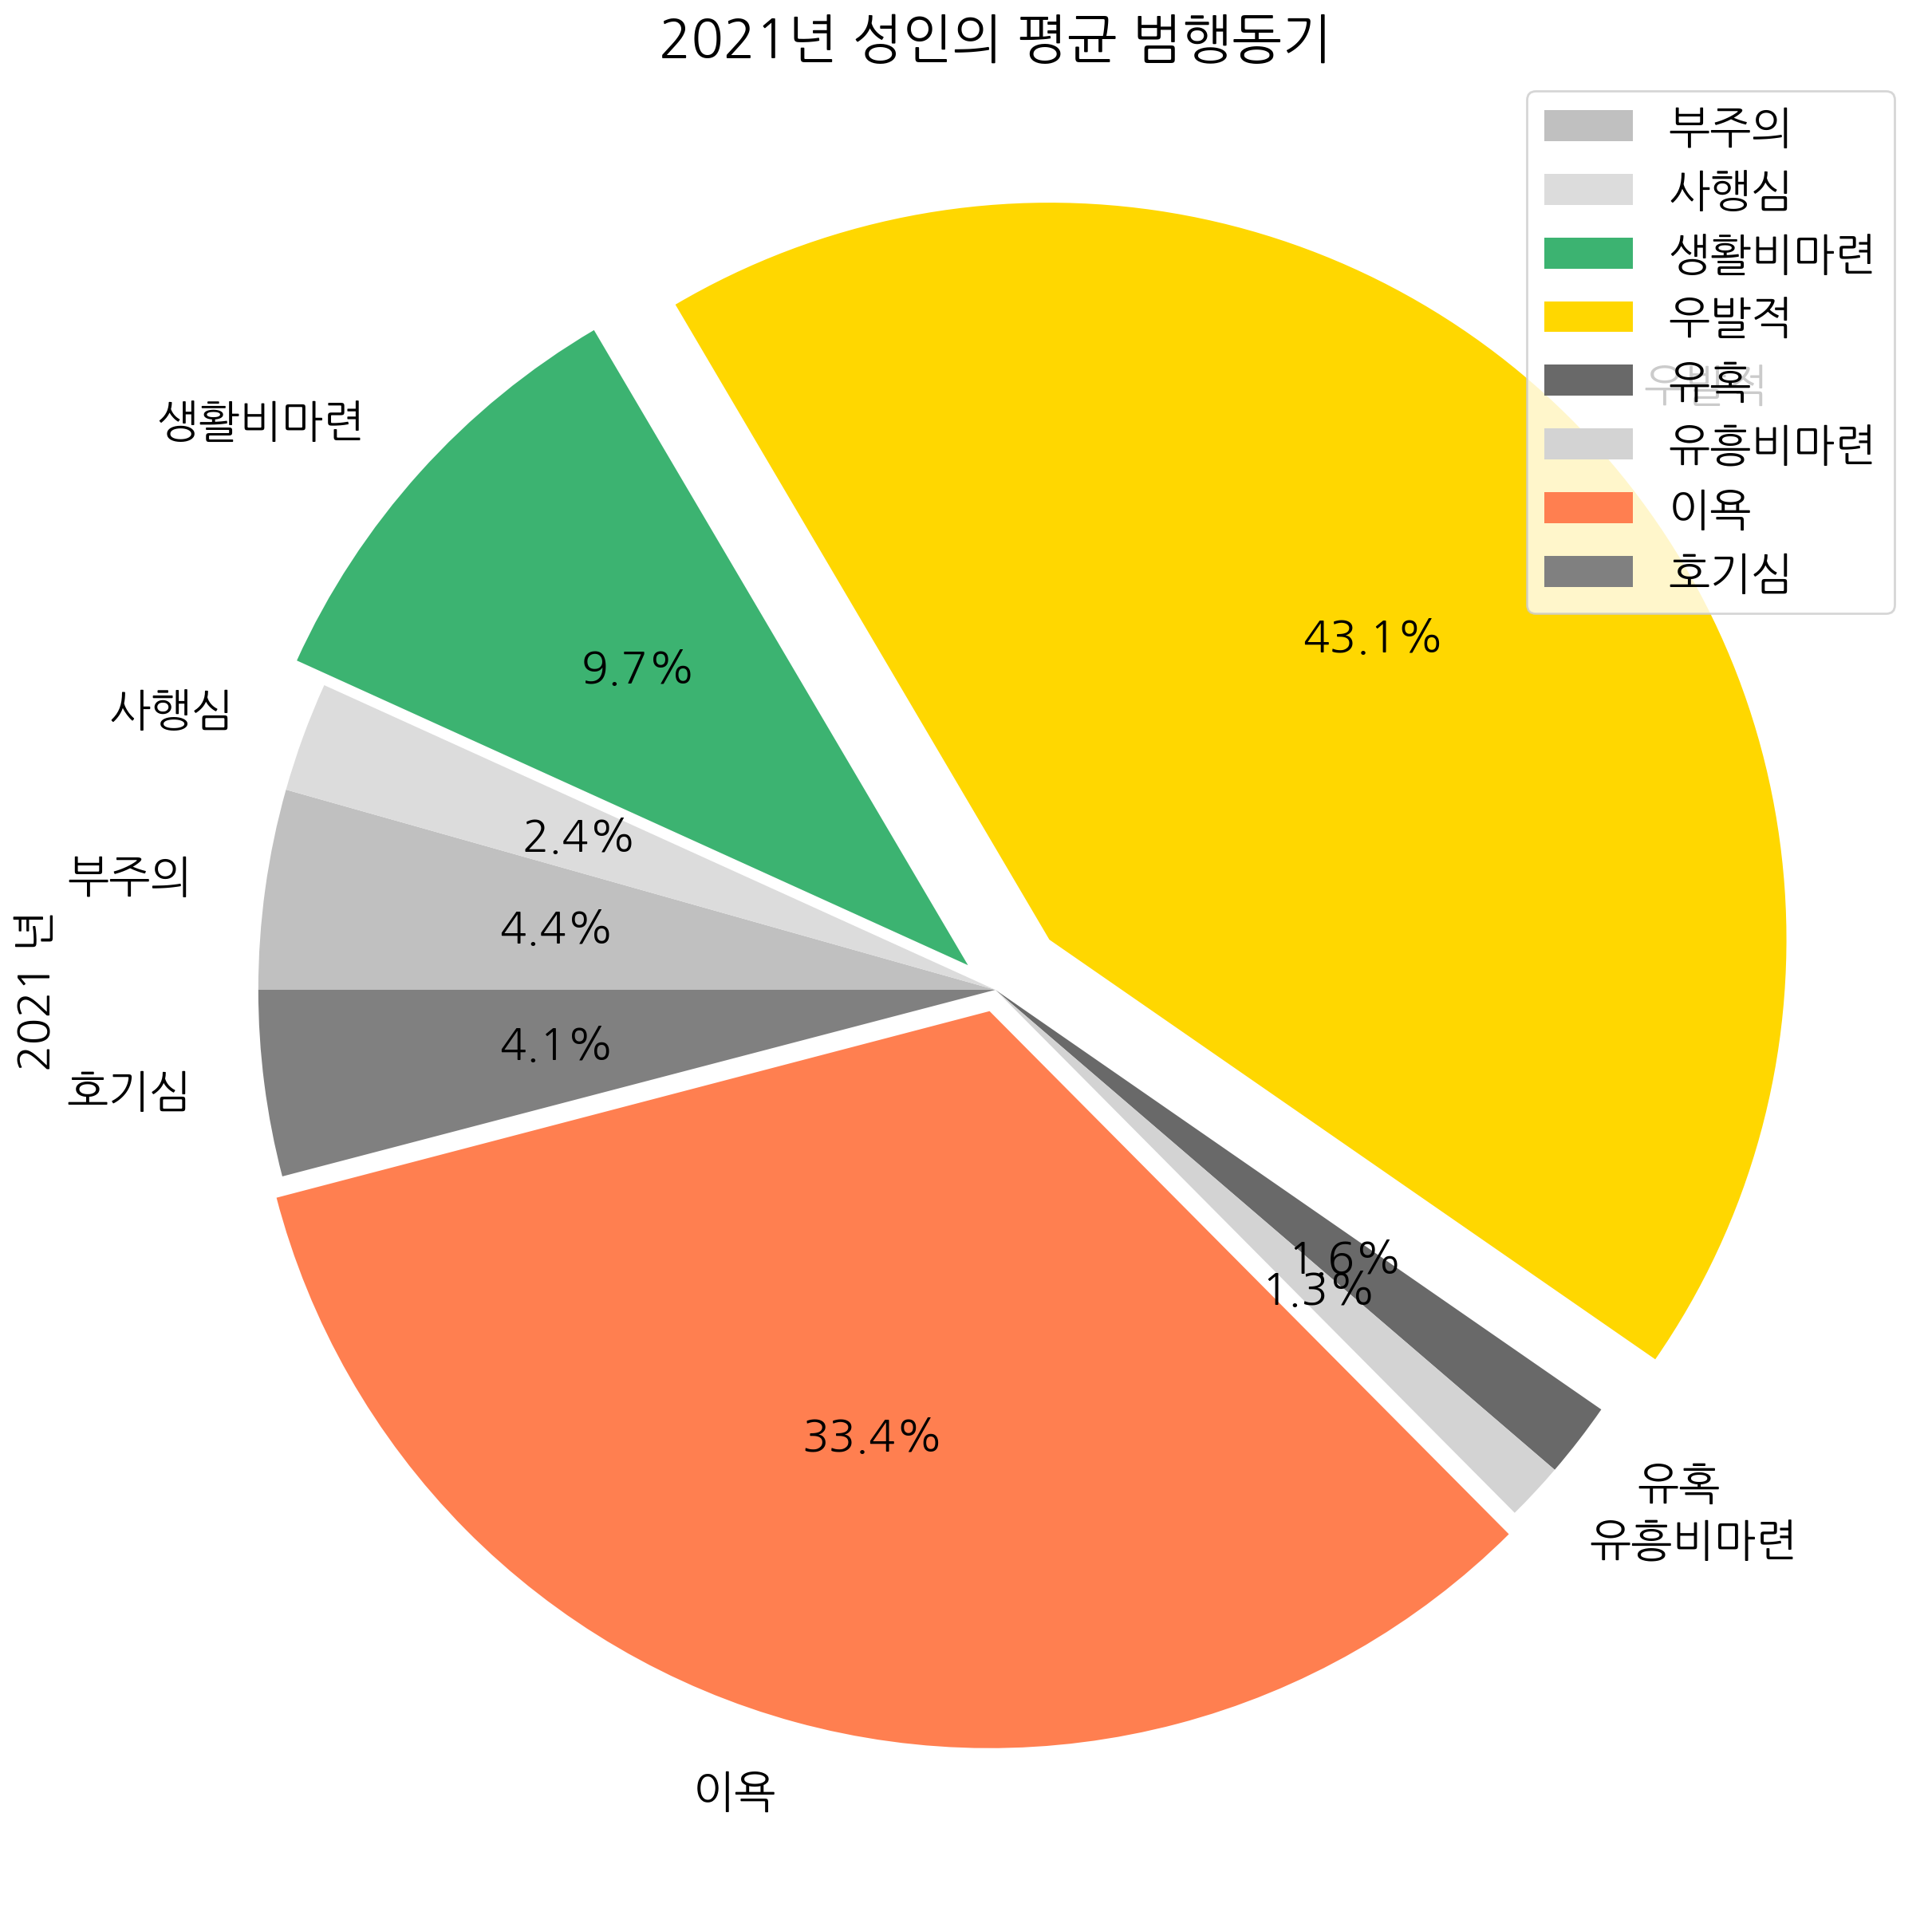

In [53]:
explode = [0, 0, 0.05, 0.1, 0, 0, 0.03, 0]
colors = ['silver','gainsboro','mediumseagreen', 'gold', 'dimgray', 'lightgray','coral','grey']
df_re2021.plot(kind='pie', figsize=(20,15), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False, explode=explode, colors=colors)
plt.rc('xtick', labelsize=20)
plt.title("2021년 성인의 평균 범행동기")

In [29]:
df_rere = re1_5.transpose()
df_rere['평균'] = (df_rere['2011 년'] + df_rere['2012 년'] + df_rere['2013 년'] + df_rere['2014 년'] + df_rere['2015 년'] + df_rere['2016 년'] + df_rere['2017 년'] + df_rere['2018 년'] + df_rere['2019 년'] + df_rere['2020 년'] + df_rere['2021 년'] / 11).round(2)

In [30]:
df_rere = df_rere.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년','2021 년'], axis=1)
df_rere

,평균
범행동기별,
부주의,30723.73
사행심,18597.18
생활비마련,106930.64
우발적,323475.36
유혹,25398.45
유흥비마련,32040.18
이욕,298104.09
호기심,48421.00


<AxesSubplot:xlabel='범행동기별'>

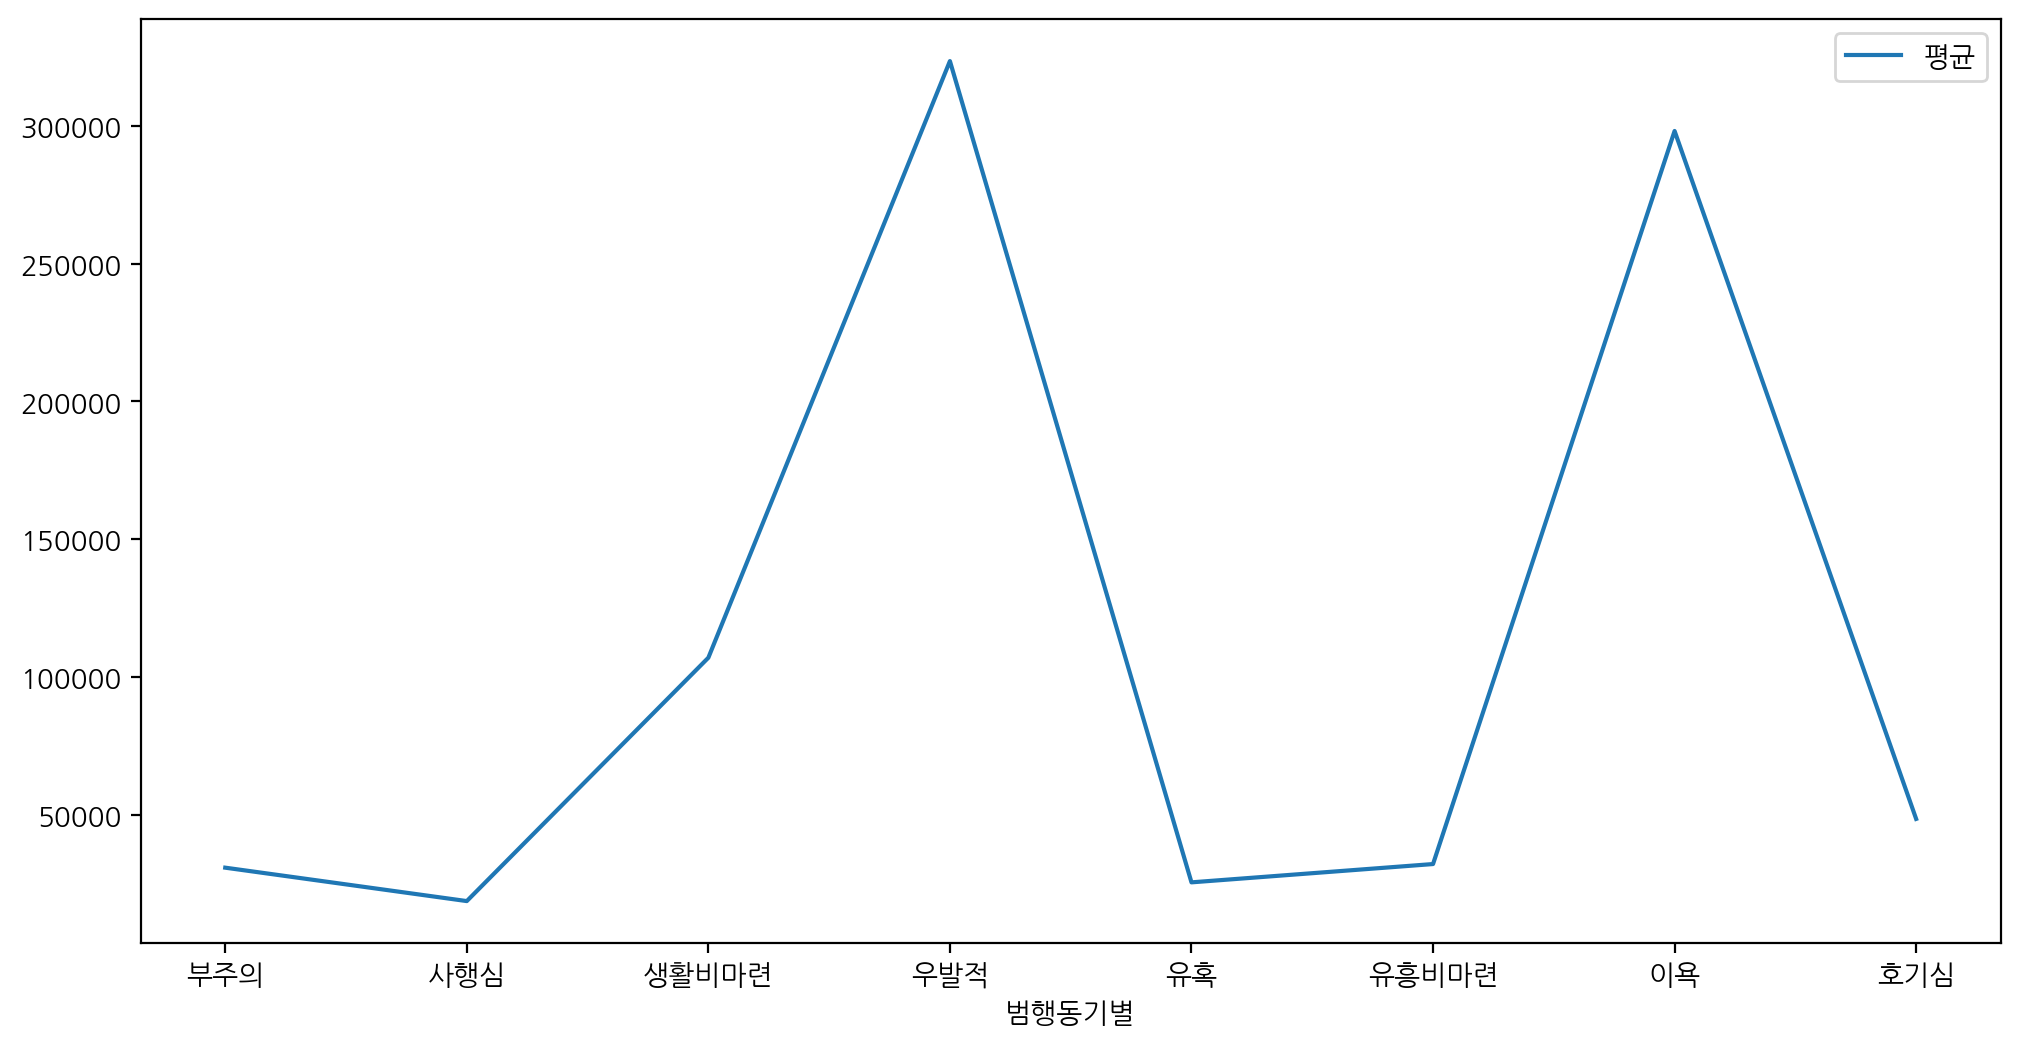

In [31]:
df_rere.plot(figsize=(12,6))

Text(0.5, 1.0, '성인의 평균 범행동기')

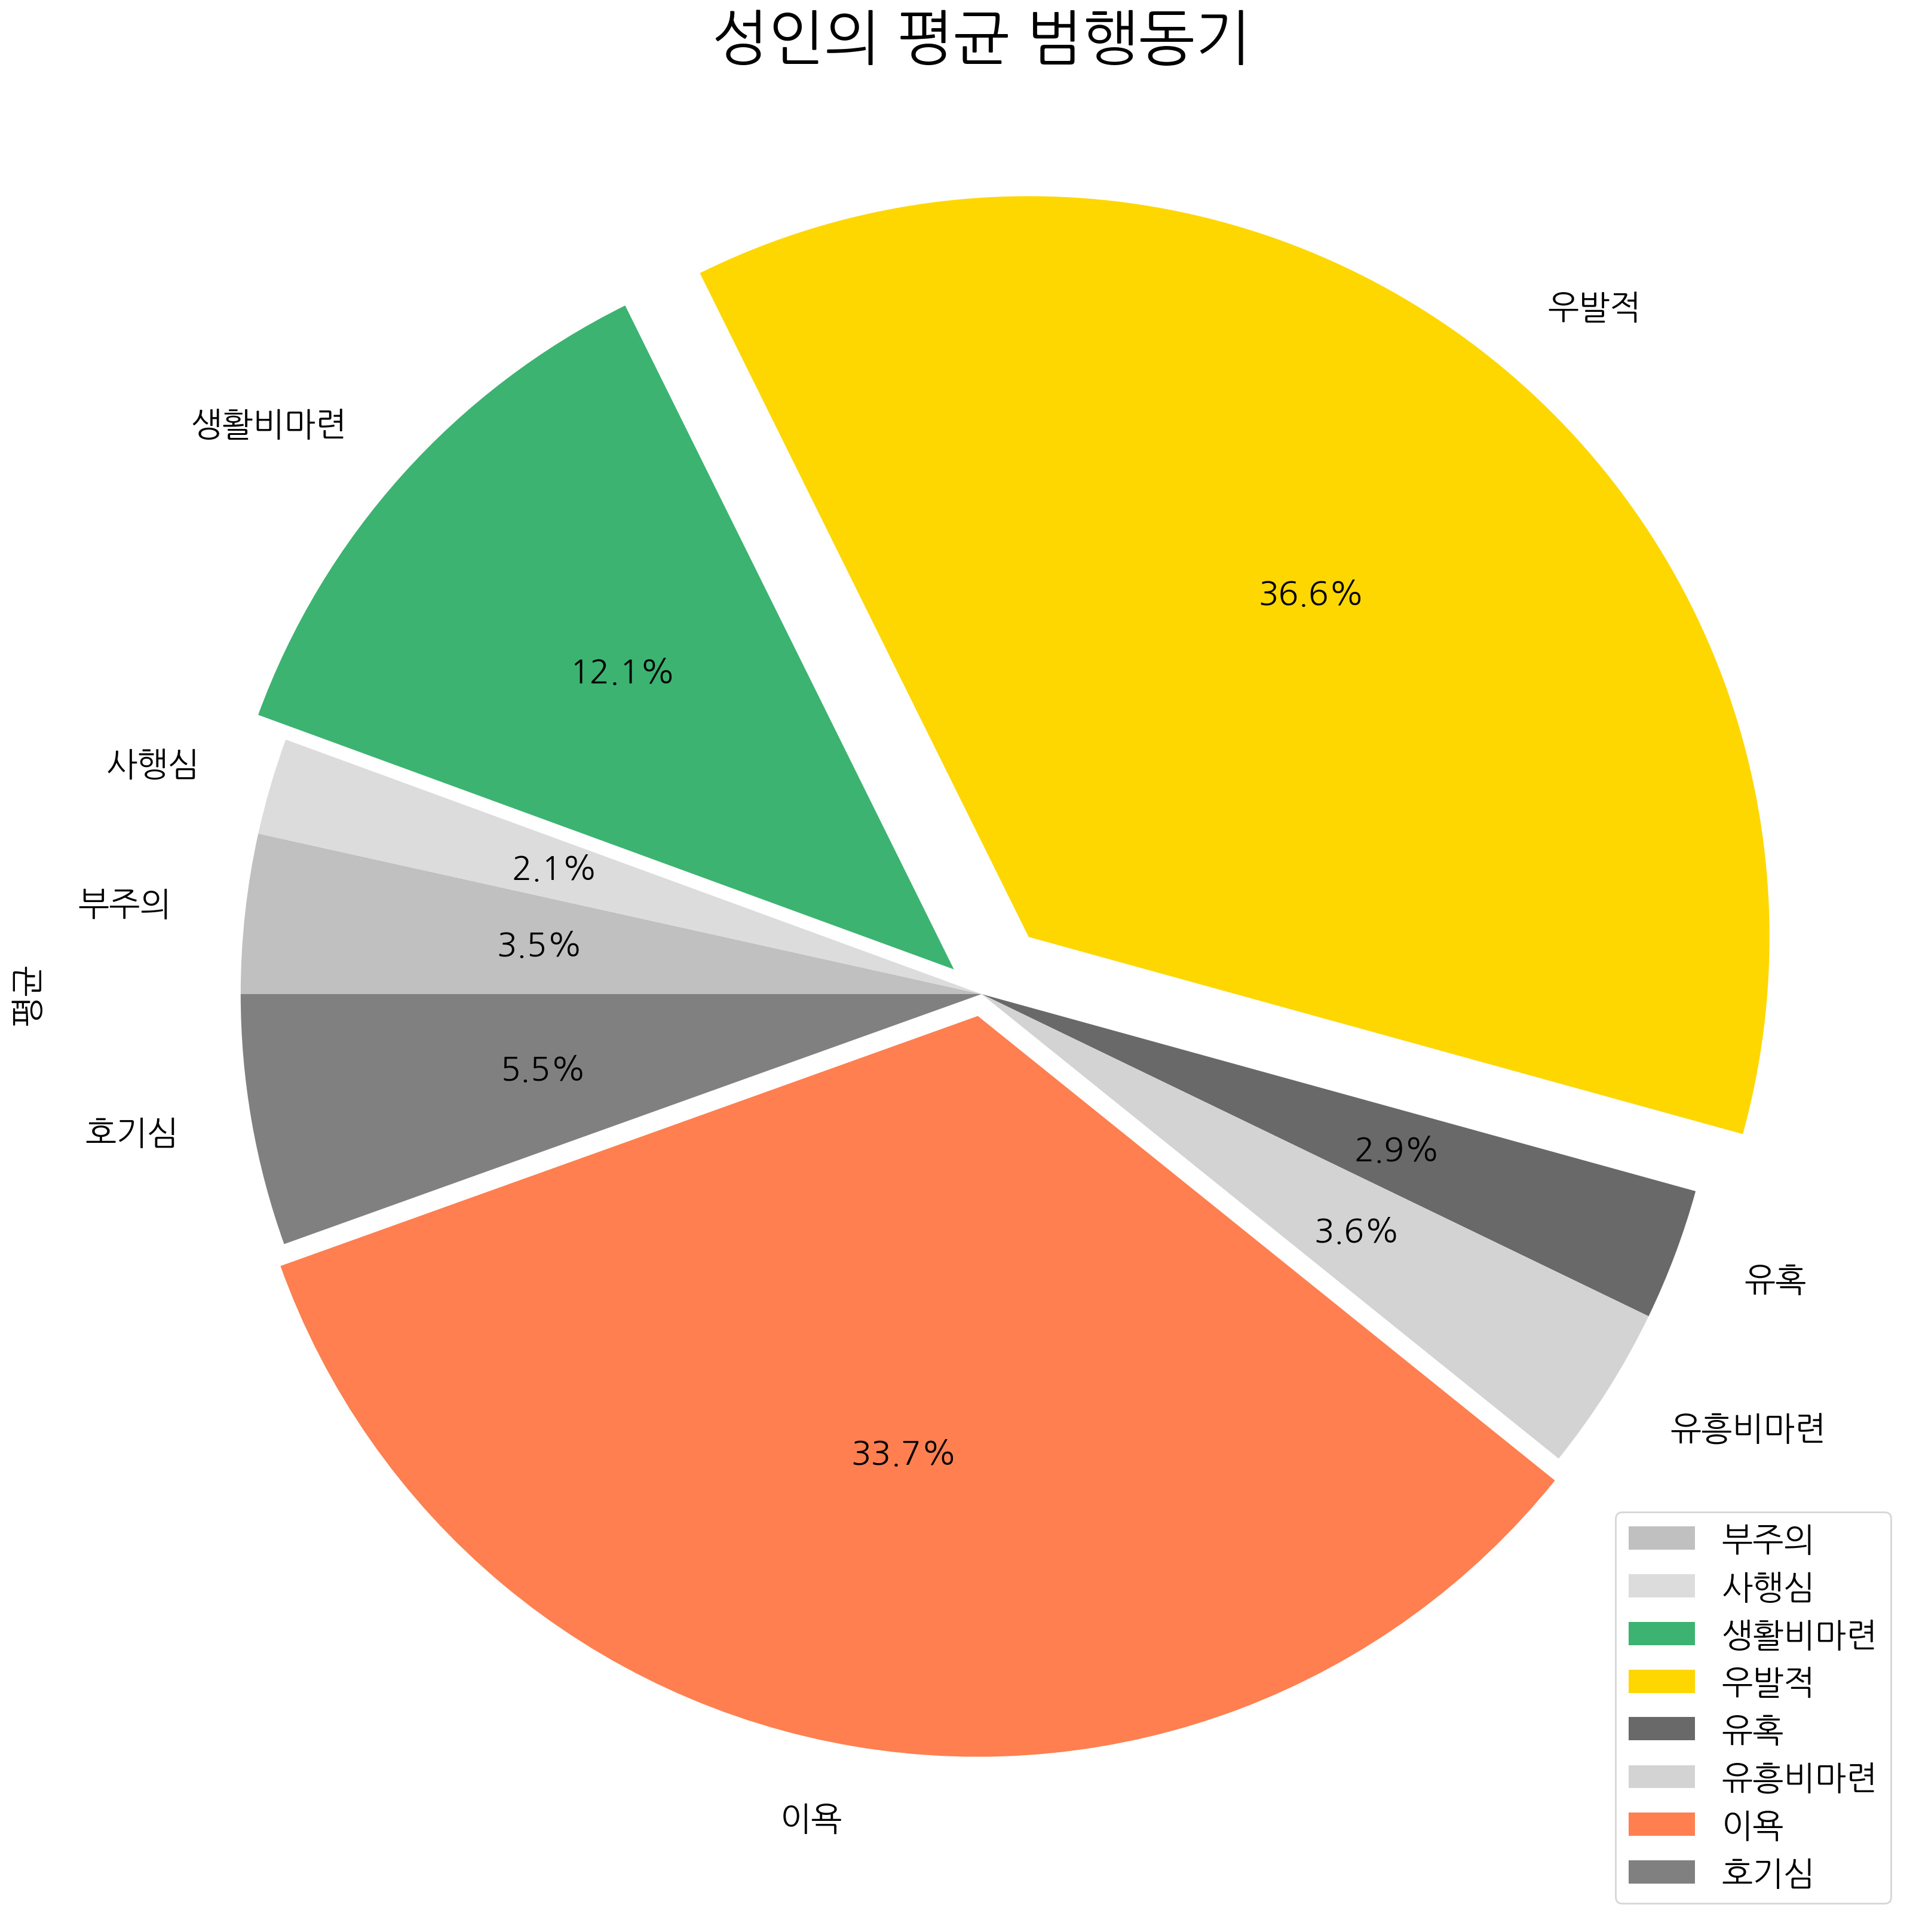

In [84]:
explode = [0, 0, 0.05, 0.1, 0, 0, 0.03, 0]
colors = ['silver','gainsboro','mediumseagreen', 'gold', 'dimgray', 'lightgray','coral','grey']
df_rere.plot(kind='pie', figsize=(20,25), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False, explode=explode, colors=colors)
plt.rc('font', size=30)
plt.rc('axes', labelsize=20)  
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=20)  # 범례 폰트 크기
plt.rc('figure', titlesize=50)
plt.title("성인의 평균 범행동기")

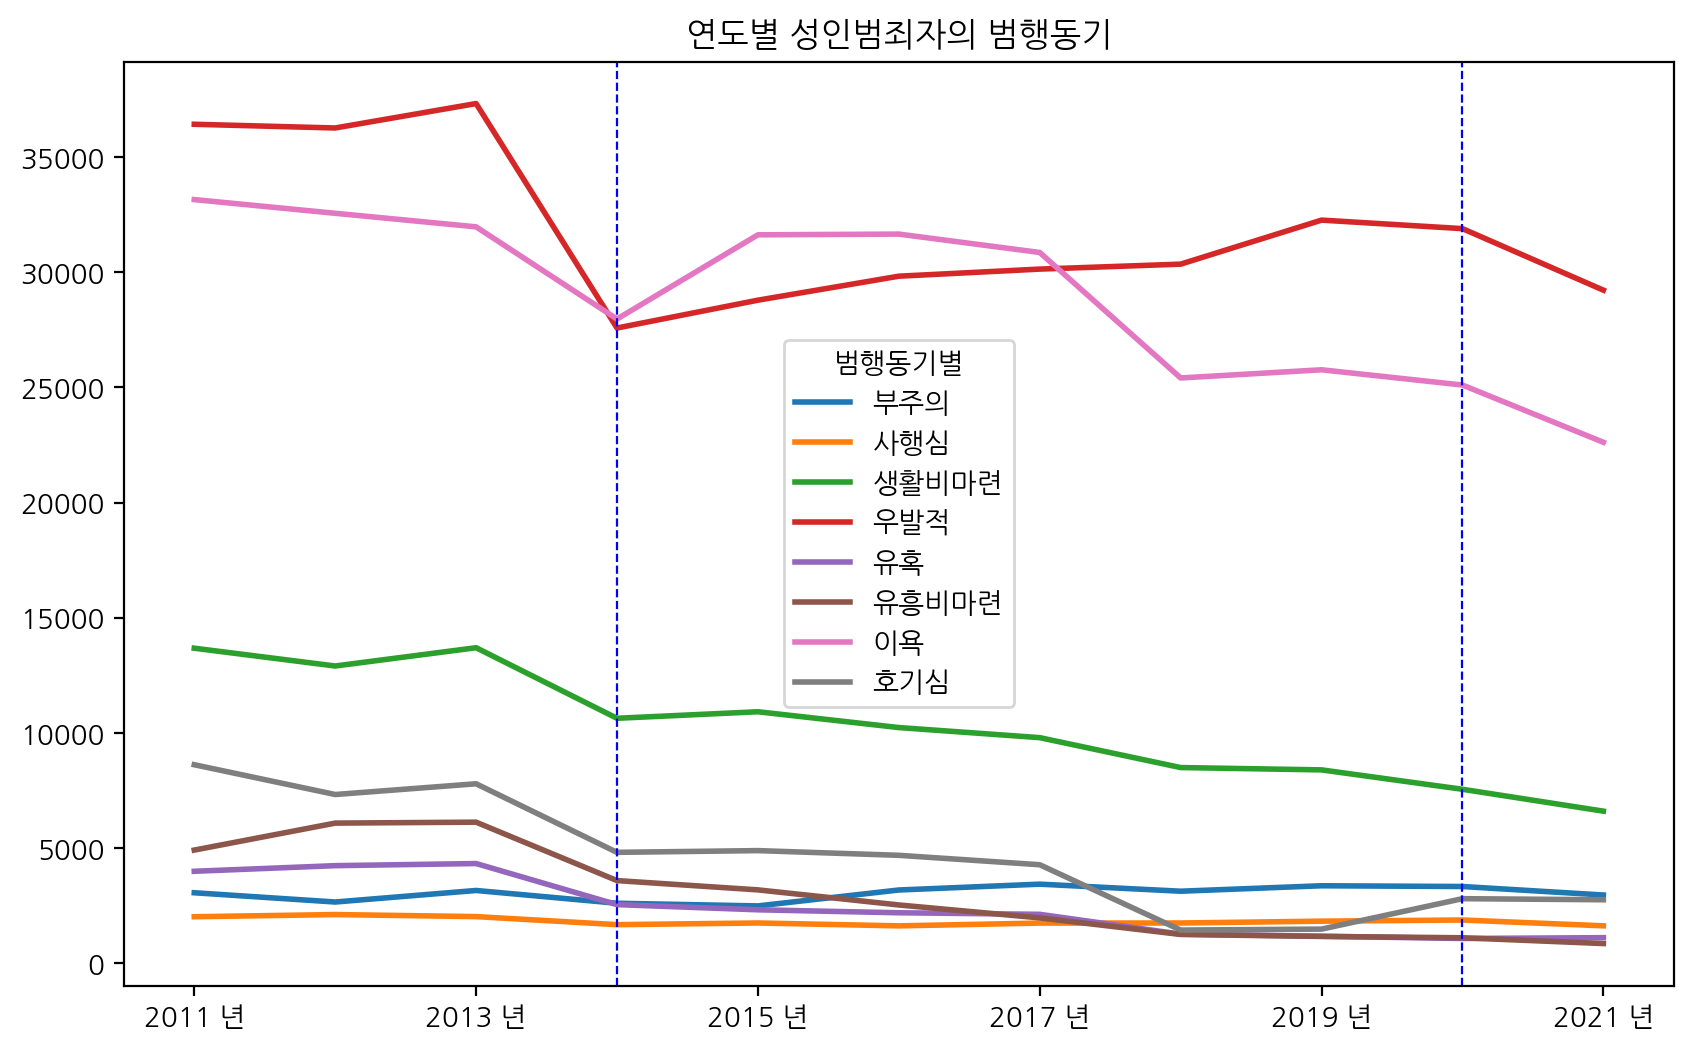

In [177]:
re1_5.plot(figsize=(10,6),lw=2)
plt.title("연도별 성인범죄자의 범행동기")
plt.axvline(3, c="b", ls="--", lw=0.8)
plt.axvline(9, c="b", ls="--", lw=0.8)

In [190]:
re1_5_2012_2014_2020 = re1_5.drop(['2011 년','2013 년','2015 년','2016 년','2017 년','2018 년','2019 년','2021 년'], axis=0)
re1_5_2012_2014_2020 = re1_5_2012_2014_2020.transpose()
re1_5_2012_2014_2020

,2012 년,2014 년,2020 년
범행동기별,,,
부주의,2663,2609,3336
사행심,2119,1680,1882
생활비마련,12907,10638,7556
우발적,36259,27577,31890
유혹,4241,2550,1080
유흥비마련,6088,3593,1111
이욕,32556,27967,25102
호기심,7329,4819,2808


Text(0.5, 1.0, '연도별 성인범죄자의 범행동기')

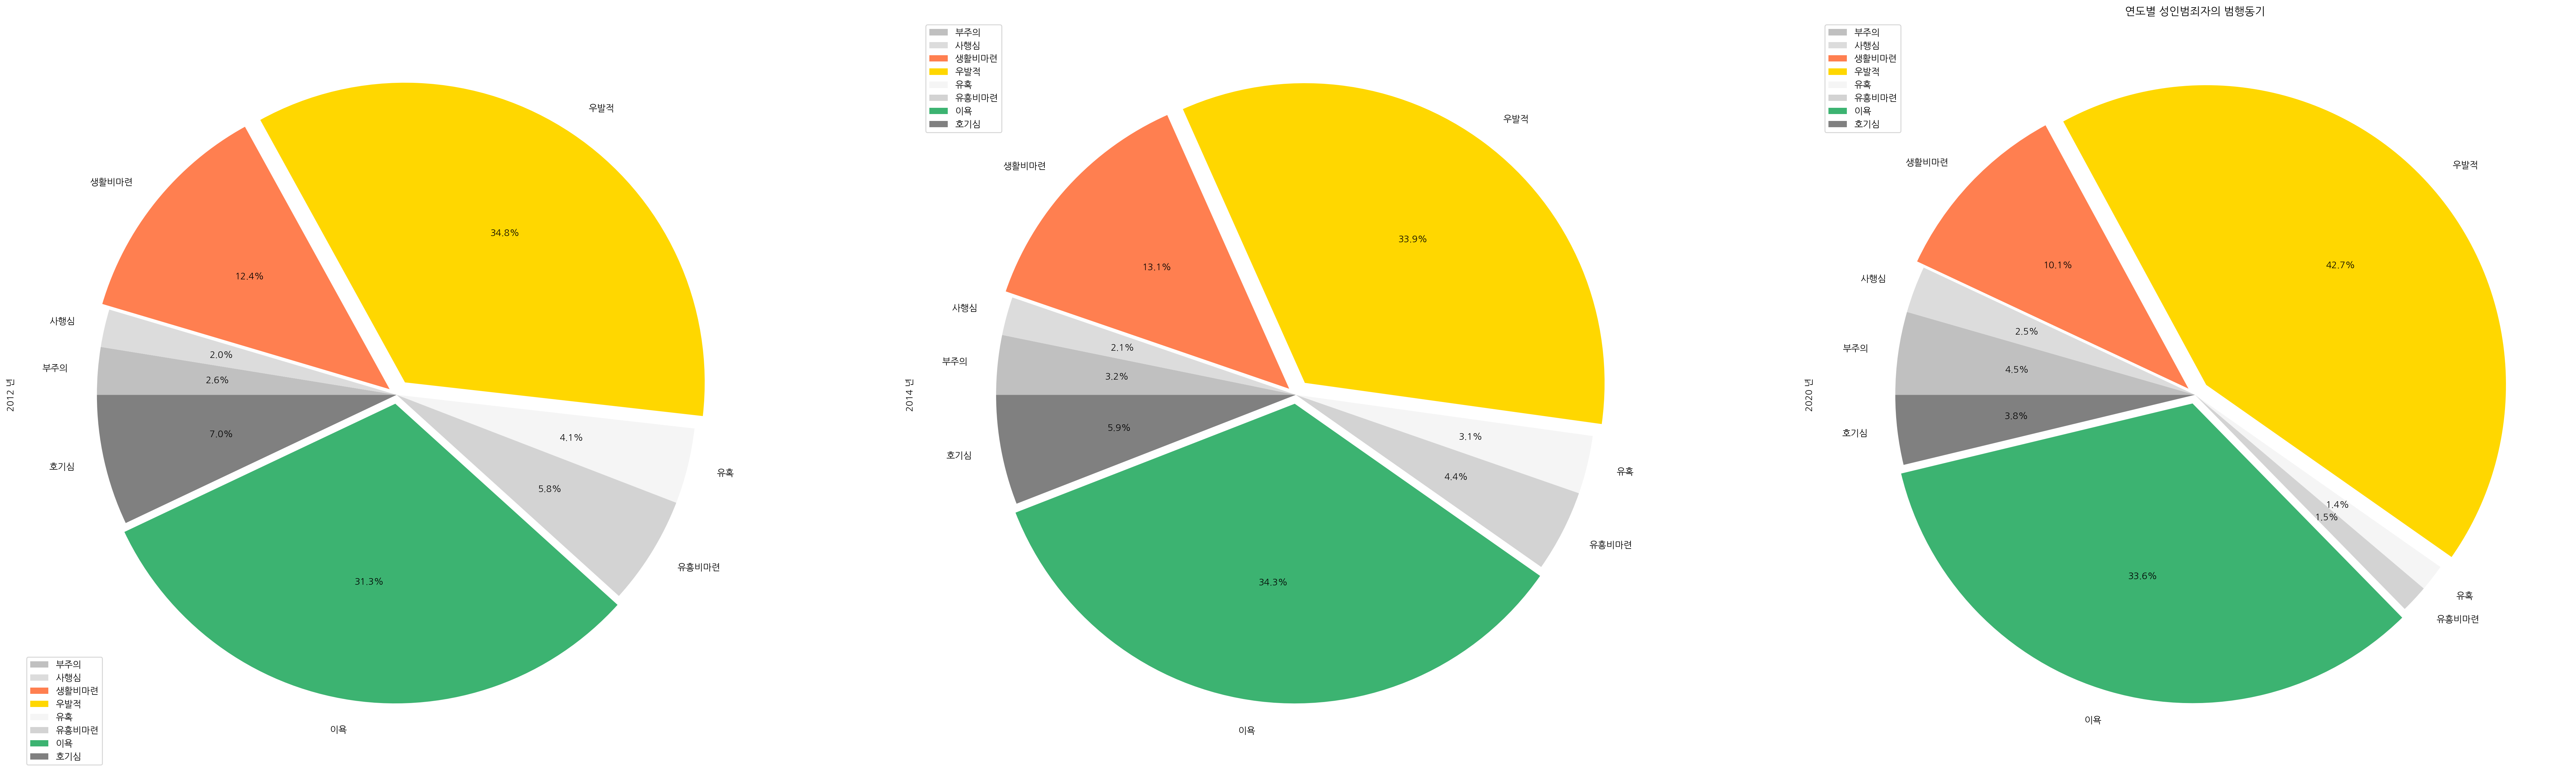

In [213]:
explode = [0, 0, 0.03, 0.05, 0, 0, 0.03, 0]
colors = ['silver','gainsboro','coral', 'gold', 'whitesmoke', 'lightgray','mediumseagreen','grey']
re1_5_2012_2014_2020.plot(kind='pie', figsize=(50,100), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False, explode=explode, colors=colors)

plt.title("연도별 성인범죄자의 범행동기")

In [188]:
re1_5_2014 = re1_5.drop(['2011 년','2012 년','2013 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년','2021 년'], axis=0)
re1_5_2014 = re1_5_2014.transpose()
re1_5_2014

,2014 년
범행동기별,
부주의,2609
사행심,1680
생활비마련,10638
우발적,27577
유혹,2550
유흥비마련,3593
이욕,27967
호기심,4819


Text(0.5, 1.0, '연도별 성인범죄자의 범행동기')

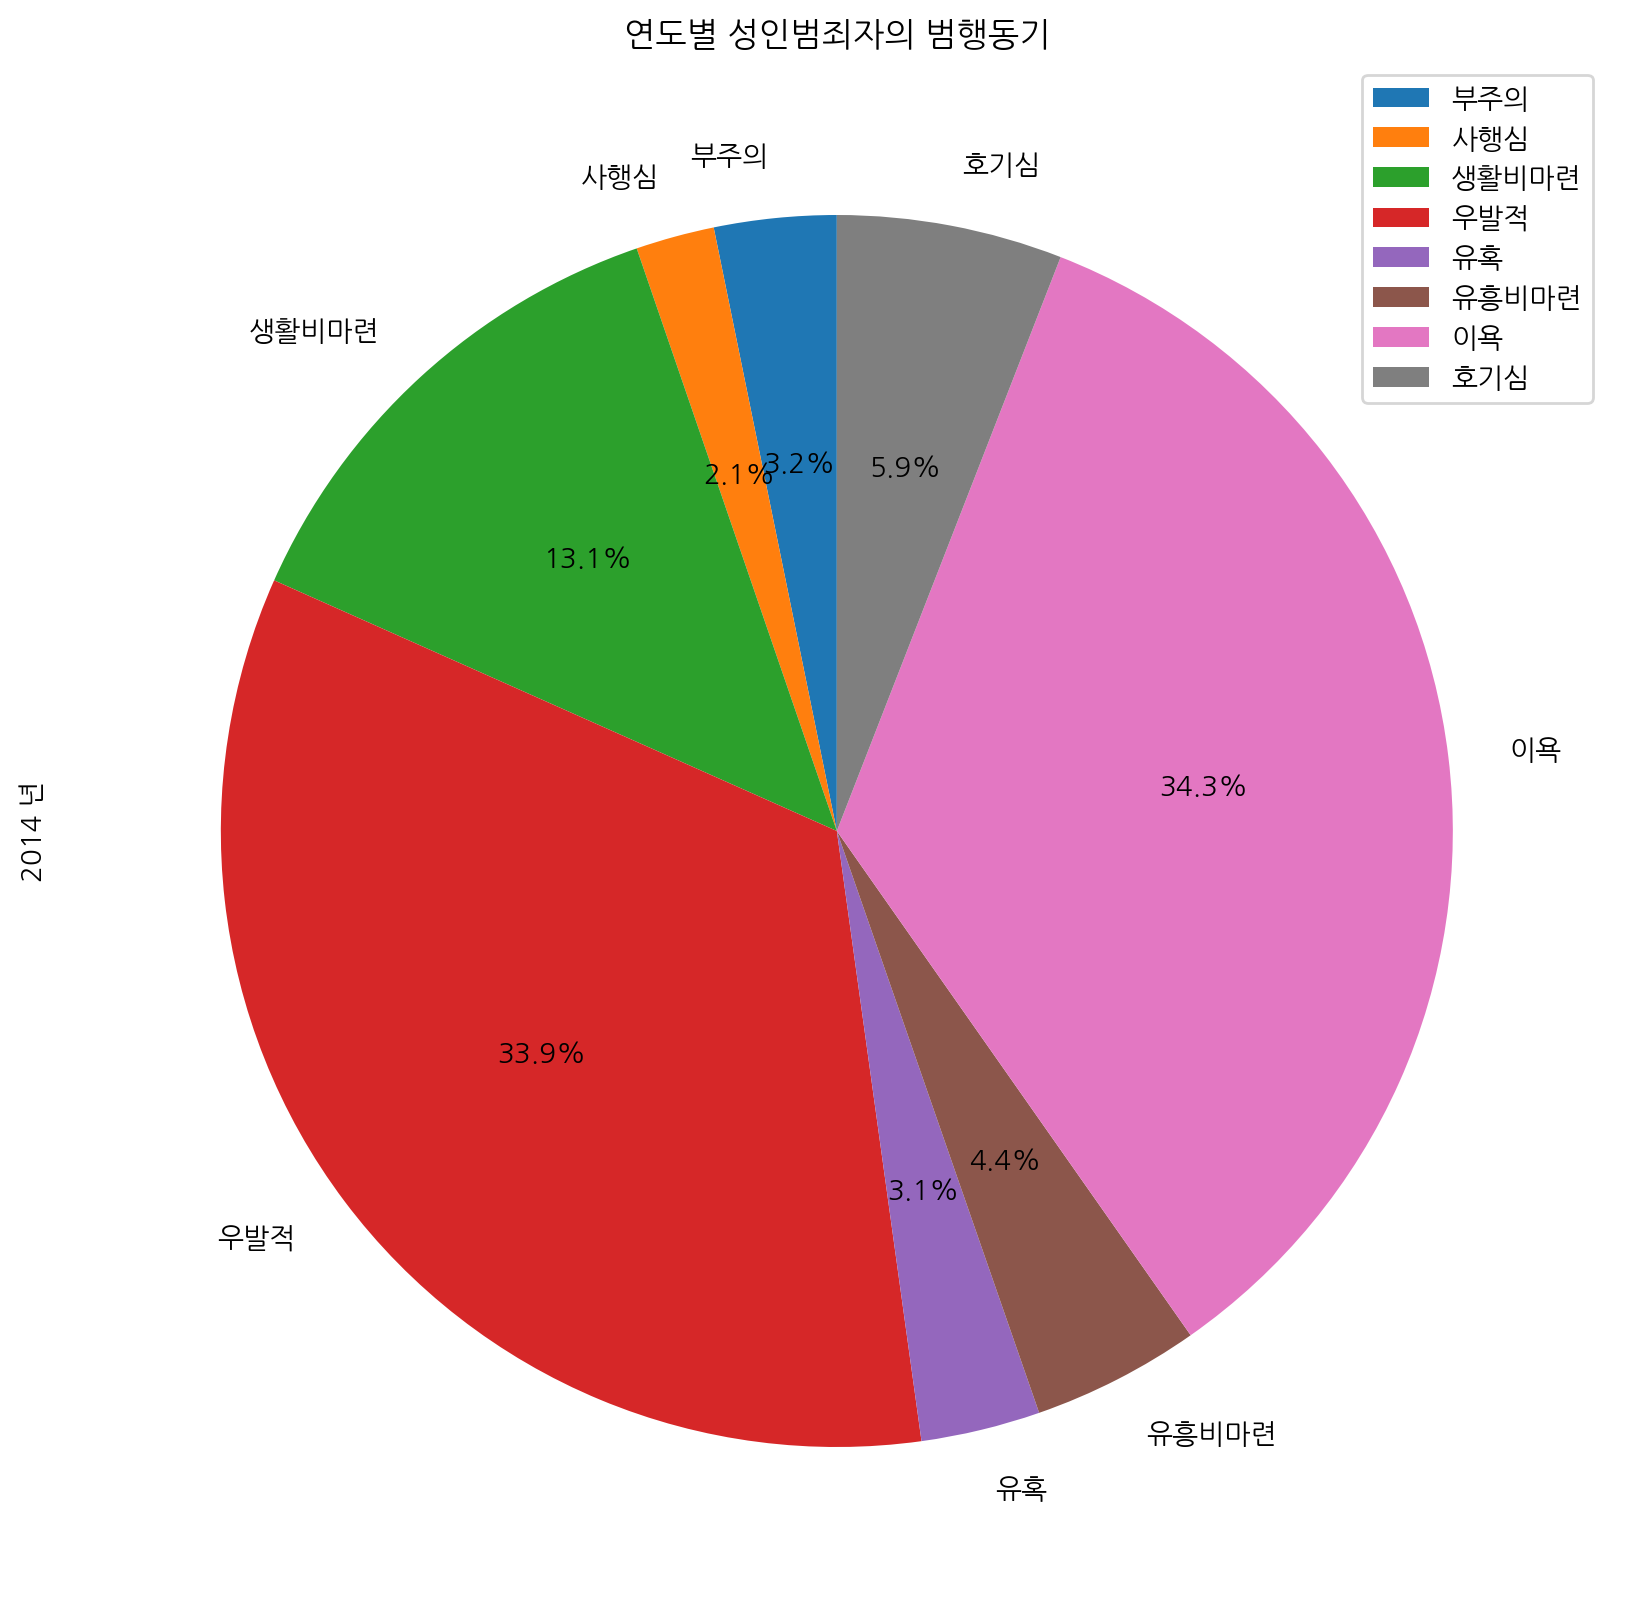

In [189]:
re1_5_2014.plot(kind='pie', figsize=(15,10), subplots=True, autopct='%1.1f%%', startangle=90)
plt.title("연도별 성인범죄자의 범행동기")

In [127]:
df_re1 = df_re1.drop(['항목','단위','Unnamed: 15','범죄별'], axis=1)
df_re1 = df_re1.drop([22])
df_re1

,범행동기별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
0,합계,1907641,2117737,2147250,1879548,1948966,2020196,1861796.0,1749459,1754808,1638387,1359952
1,이욕,146361,146467,139654,129876,144506,156009,150743.0,139967,147402,140343,114287
2,생활비마련,58816,55495,59591,54603,54558,56358,55006.0,52381,53466,51354,44507
3,유흥비마련,9502,11313,11092,7432,6944,6164,5223.0,3935,3648,3772,2443
4,도박비마련,1530,1177,1225,1307,1661,2008,2015.0,1890,2125,2192,2120
...,...,...,...,...,...,...,...,...,...,...,...,...
5341,우발적,4330,4031,4828,1297,1524,1475,2045.0,2674,3381,2293,2323
5342,현실불만,148,154,359,85,92,109,111.0,83,136,109,78
5343,부주의,13135,14088,12851,6638,7515,8518,10499.0,11580,13373,10614,9247
5344,기타,42089,42498,40481,16379,17710,19157,20417.0,18129,19226,17109,15414


In [101]:
df_re1 = df_re1.set_index("범행동기별")
df_re1 = df_re1.sort_index()
df_re1.head()

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
범행동기별,,,,,,,,,,,
가정불화,-,-,3,2,1,1,3.0,1,-,1,4
가정불화,48,55,59,87,58,48,42.0,40,39,37,26
가정불화,114,95,83,80,89,81,76.0,69,67,58,60
가정불화,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가정불화,NaN,NaN,NaN,-,1,1,NaN,-,-,-,-


In [102]:
df_re1 = df_re1.astype({'2017 년': 'int'})
df_re1

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [51]:
df_re1 = df_re1.astype('int')
df_re1

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
범행동기별,,,,,,,,,,,
가정불화,5104,5610,6678,6450,19066,24492,21100,19057,21291,18437,20178
기타,238,303,259,214,245,367,221,164,170,169,168
기타,44804,45796,41124,43712,54060,58671,57236,53487,59513,59308,46879
기타,199984,245193,236397,238027,240423,238734,216178,181080,182598,180130,154106
도박비마련,1426,1117,1171,1230,1606,1944,1948,1850,2091,2152,2036
미상,358252,453033,480012,336589,359275,363094,357530,393488,397845,371610,244748
보복,315,414,348,358,371,495,343,300,294,304,332
부주의,20610,20601,20987,22178,21708,23233,23640,23778,25752,23065,18576
사행심,20741,18600,17052,15868,15097,17184,13841,14154,14968,14142,10100


In [52]:
df_re1.dtypes

2011 년    int32
2012 년    int32
2013 년    int32
2014 년    int32
2015 년    int32
2016 년    int32
2017 년    int32
2018 년    int32
2019 년    int32
2020 년    int32
2021 년    int32
dtype: object

In [62]:
df_re1_2011 = df_re1['2011 년'].sort_values(ascending=False)
df_re1_2011

범행동기별
미상       358252
우발적      236432
기타       199984
이욕        87589
기타        44804
생활비마련     30161
사행심       20741
부주의       20610
호기심       11351
유흥비마련      9064
현실불만       8461
유혹         5790
가정불화       5104
도박비마련      1426
치부         1335
허영사치심       799
보복          315
기타          238
신고·고소        67
증언            6
수사협조          4
Name: 2011 년, dtype: int32

In [82]:
df_re1_2011 = df_re1.drop(['2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년','2021 년'], axis=1)
df_re1_2011 = df_re1_2011.transpose()
df_re1_2011 = df_re1_2011.drop(['미상','기타','기타','호기심','유흥비마련','현실불만','유혹','가정불화','도박비마련','치부','허영사치심','보복','기타','신고·고소','증언','수사협조'],axis=1)
df_re1_2011= df_re1_2011.transpose()

Text(0.5, 1.0, '2011년 가장높은 범행동기 비교')

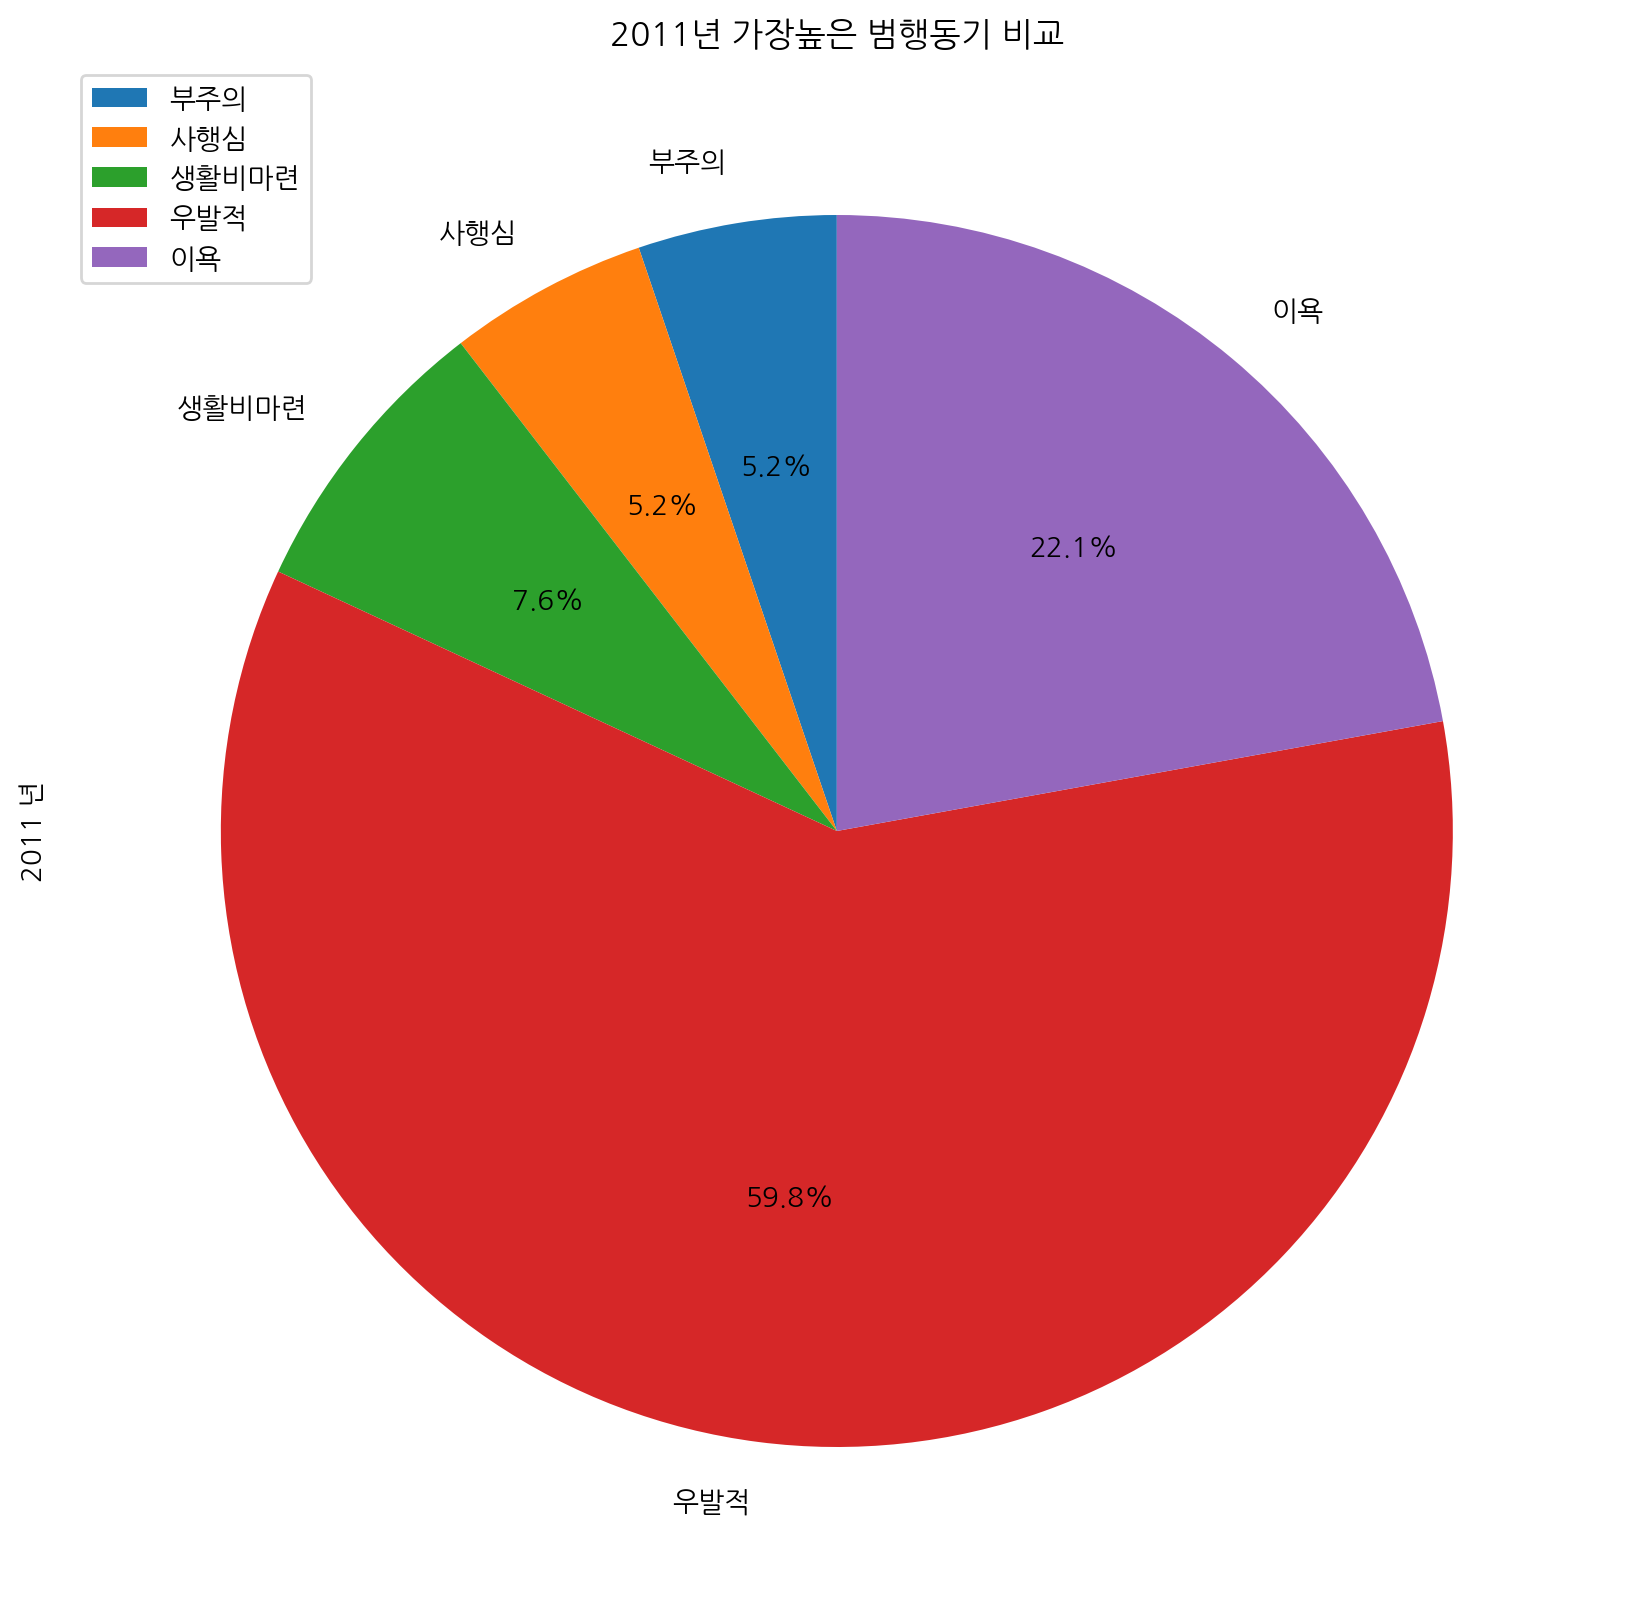

In [139]:
df_re1_2011.plot(kind='pie', figsize=(13,10), subplots=True, autopct='%1.1f%%', startangle=90)
plt.title("2011년 가장높은 범행동기 비교")

In [84]:
df_re1_2021 = df_re1['2021 년'].sort_values(ascending=False)
df_re1_2021

범행동기별
미상       244748
우발적      196043
기타       154106
이욕        82469
기타        46879
생활비마련     30739
가정불화      20178
부주의       18576
사행심       10100
호기심        7964
현실불만       3391
유혹         3022
유흥비마련      2322
도박비마련      2036
보복          332
치부          275
허영사치심       218
기타          168
신고·고소       148
증언           12
수사협조          4
Name: 2021 년, dtype: int32

In [85]:
df_re1_2021 = df_re1.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년'], axis=1)
df_re1_2021 = df_re1_2021.transpose()
df_re1_2021 = df_re1_2021.drop(['미상','기타','기타','호기심','유흥비마련','현실불만','유혹','사행심','도박비마련','치부','허영사치심','보복','기타','신고·고소','증언','수사협조'],axis=1)
df_re1_2021 = df_re1_2021.transpose()

Text(0.5, 1.0, '2021년 가장높은 범행동기 비교')

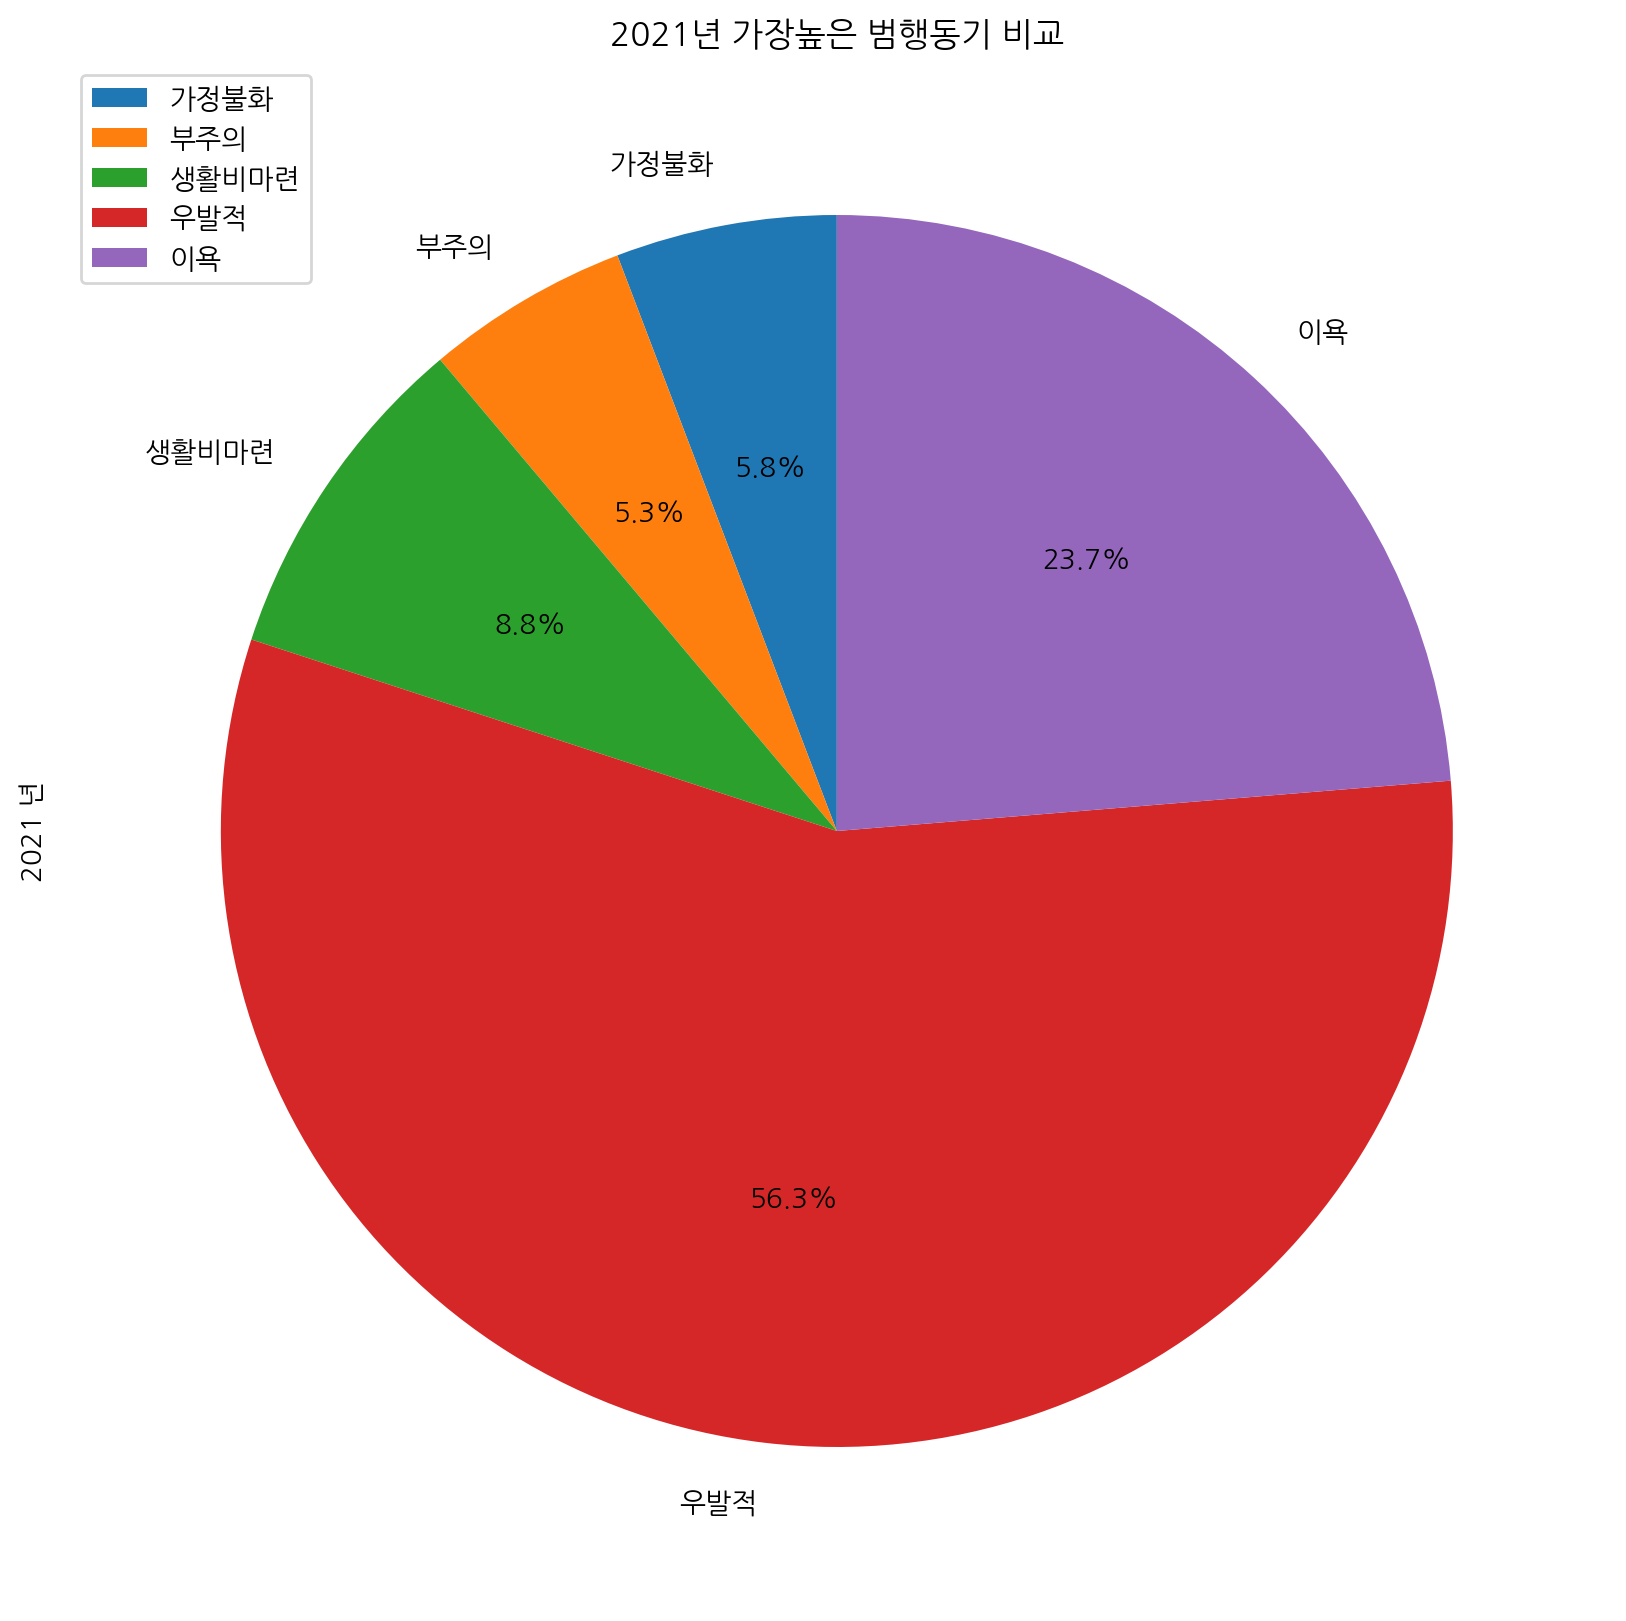

In [138]:
df_re1_2021.plot(kind='pie', figsize=(13,10), subplots=True, autopct='%1.1f%%', startangle=90)
plt.title("2021년 가장높은 범행동기 비교")

### 소년범죄자 동기

In [15]:
df_re2 = pd.read_csv(file_paths[1], encoding='cp949')
df_re2_5 = df_re2[(df_re2['범죄별']=='살인') | (df_re2['범죄별']=='강도')| (df_re2['범죄별']=='강간')| (df_re2['범죄별']=='절도')| (df_re2['범죄별']=='폭력')]
df_re2_5

,범죄별,범행동기별,항목,단위,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 15
66,절도,합계,소년범죄자 범행동기[명],명,31380,37256,33092,26047,21170,22534,20008.0,16904,17141,17066,12715,NaN
67,절도,이욕,소년범죄자 범행동기[명],명,8111,10660,10011,7811,6869,6981,5745.0,2932,2664,3556,3402,NaN
68,절도,생활비마련,소년범죄자 범행동기[명],명,2101,2773,3138,2012,1761,1667,1343.0,779,688,1030,1019,NaN
69,절도,유흥비마련,소년범죄자 범행동기[명],명,2228,3672,3717,1951,1491,1350,992.0,500,456,560,513,NaN
70,절도,도박비마련,소년범죄자 범행동기[명],명,8,10,12,9,19,13,9.0,3,6,4,21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,강간,우발적,소년범죄자 범행동기[명],명,533,463,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,강간,현실불만,소년범죄자 범행동기[명],명,6,11,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,강간,부주의,소년범죄자 범행동기[명],명,20,13,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,강간,기타,소년범죄자 범행동기[명],명,468,383,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_re2_5 = df_re2_5.drop(['항목','단위','Unnamed: 15','범죄별'], axis=1)
df_re2_5

,범행동기별,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
66,합계,31380,37256,33092,26047,21170,22534,20008.0,16904,17141,17066,12715
67,이욕,8111,10660,10011,7811,6869,6981,5745.0,2932,2664,3556,3402
68,생활비마련,2101,2773,3138,2012,1761,1667,1343.0,779,688,1030,1019
69,유흥비마련,2228,3672,3717,1951,1491,1350,992.0,500,456,560,513
70,도박비마련,8,10,12,9,19,13,9.0,3,6,4,21
...,...,...,...,...,...,...,...,...,...,...,...,...
303,우발적,533,463,501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,현실불만,6,11,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,부주의,20,13,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,기타,468,383,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_re2_5 = df_re2_5.set_index("범행동기별")
df_re2_5 = df_re2_5.sort_index()
df_re2_5

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
범행동기별,,,,,,,,,,,
가정불화,-,-,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가정불화,1,1,3,2,-,2,NaN,1,2,1,4
가정불화,-,-,-,-,-,-,NaN,1,-,-,1
가정불화,17,17,26,16,12,9,14.0,5,1,5,12
기타,-,2,-,2,-,-,NaN,1,1,-,-
...,...,...,...,...,...,...,...,...,...,...,...
현실불만,6,11,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
호기심,5656,4827,4527,4010,2966,3728,3482.0,1000,1008,2378,2371
호기심,-,-,-,-,-,-,NaN,-,-,-,-


In [18]:
df_re2_5=df_re2_5.fillna(0)
df_re2_5 = df_re2_5.replace('-','0')
df_re2_5= df_re2_5.astype({'2017 년': 'int'})
df_re2_5 = df_re2_5.astype('int')
df_re2_5

,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
범행동기별,,,,,,,,,,,
가정불화,0,0,1,0,0,0,0,0,0,0,0
가정불화,1,1,3,2,0,2,0,1,2,1,4
가정불화,0,0,0,0,0,0,0,1,0,0,1
가정불화,17,17,26,16,12,9,14,5,1,5,12
기타,0,2,0,2,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
현실불만,6,11,8,0,0,0,0,0,0,0,0
호기심,5656,4827,4527,4010,2966,3728,3482,1000,1008,2378,2371
호기심,0,0,0,0,0,0,0,0,0,0,0


In [19]:
re2_5 = df_re2_5.groupby('범행동기별').sum()
re2_5 = re2_5.transpose()
re2_5

범행동기별,가정불화,기타,도박비마련,미상,보복,부주의,사행심,생활비마련,수사협조,"신고,고소",우발적,유혹,유흥비마련,이욕,증언,치부,합계,허영사치심,현실불만,호기심
2011 년,18,10314,8,1686,3,407,565,2246,0,0,9118,1132,2559,8802,0,77,34495,161,113,6091
2012 년,18,13009,10,1688,2,363,830,2885,0,0,10100,1333,3913,11177,0,74,39845,267,89,5266
2013 년,30,9813,13,1154,9,370,654,3236,0,1,9472,1453,3919,10400,0,45,35473,159,117,5037
2014 년,18,8640,10,583,2,269,544,2072,0,0,7165,919,2080,8056,0,27,26485,72,76,4010
2015 년,12,7622,20,594,0,174,406,1825,0,0,5584,651,1600,7106,0,10,21618,74,73,2973
2016 년,11,8272,13,609,0,196,413,1720,0,0,5647,672,1438,7161,0,8,22870,64,76,3731
2017 년,14,7070,12,592,1,165,395,1387,0,1,5415,576,1017,5862,0,11,20270,75,54,3486
2018 년,7,3393,3,8005,1,75,311,810,0,0,2726,228,524,3005,0,0,17130,31,16,1001
2019 년,3,3370,6,8355,1,74,295,722,0,0,2927,209,502,2816,0,3,17527,29,15,1017
2020 년,6,4213,7,4548,1,168,402,1061,0,1,3632,285,612,3728,0,5,17399,27,48,2384


In [20]:
re2_5 = re2_5.drop(['가정불화','기타','도박비마련','미상','보복','부주의','사행심','수사협조','신고,고소','증언','치부','합계','허영사치심','현실불만'], axis=1)
re2_5

범행동기별,생활비마련,우발적,유혹,유흥비마련,이욕,호기심
2011 년,2246,9118,1132,2559,8802,6091
2012 년,2885,10100,1333,3913,11177,5266
2013 년,3236,9472,1453,3919,10400,5037
2014 년,2072,7165,919,2080,8056,4010
2015 년,1825,5584,651,1600,7106,2973
2016 년,1720,5647,672,1438,7161,3731
2017 년,1387,5415,576,1017,5862,3486
2018 년,810,2726,228,524,3005,1001
2019 년,722,2927,209,502,2816,1017
2020 년,1061,3632,285,612,3728,2384


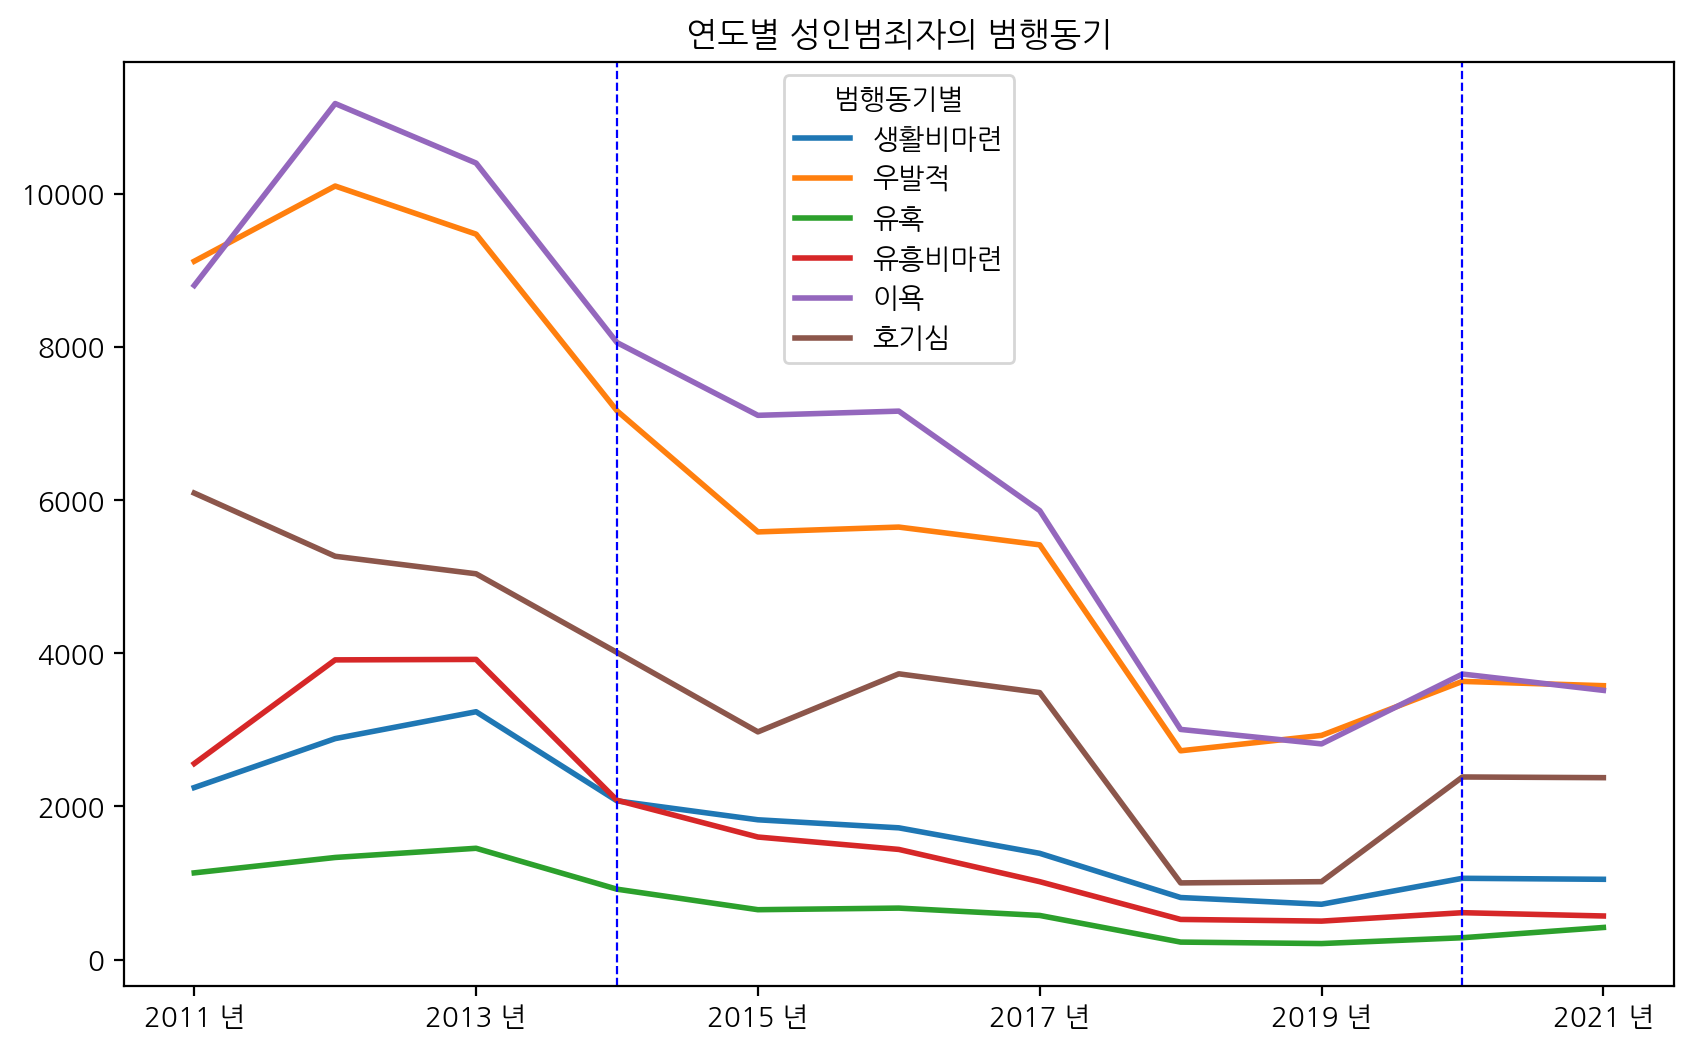

In [21]:
re2_5.plot(figsize=(10,6),lw=2)
plt.title("연도별 성인범죄자의 범행동기")
plt.axvline(3, c="b", ls="--", lw=0.8)
plt.axvline(9, c="b", ls="--", lw=0.8)

In [22]:
re2_5_2012_2014_2020 = re2_5.drop(['2011 년','2013 년','2015 년','2016 년','2017 년','2018 년','2019 년','2021 년'], axis=0)
re2_5_2012_2014_2020 = re2_5_2012_2014_2020.transpose()
re2_5_2012_2014_2020

,2012 년,2014 년,2020 년
범행동기별,,,
생활비마련,2885,2072,1061
우발적,10100,7165,3632
유혹,1333,919,285
유흥비마련,3913,2080,612
이욕,11177,8056,3728
호기심,5266,4010,2384


Text(0.5, 1.0, '연도별 소년범죄자의 범행동기')

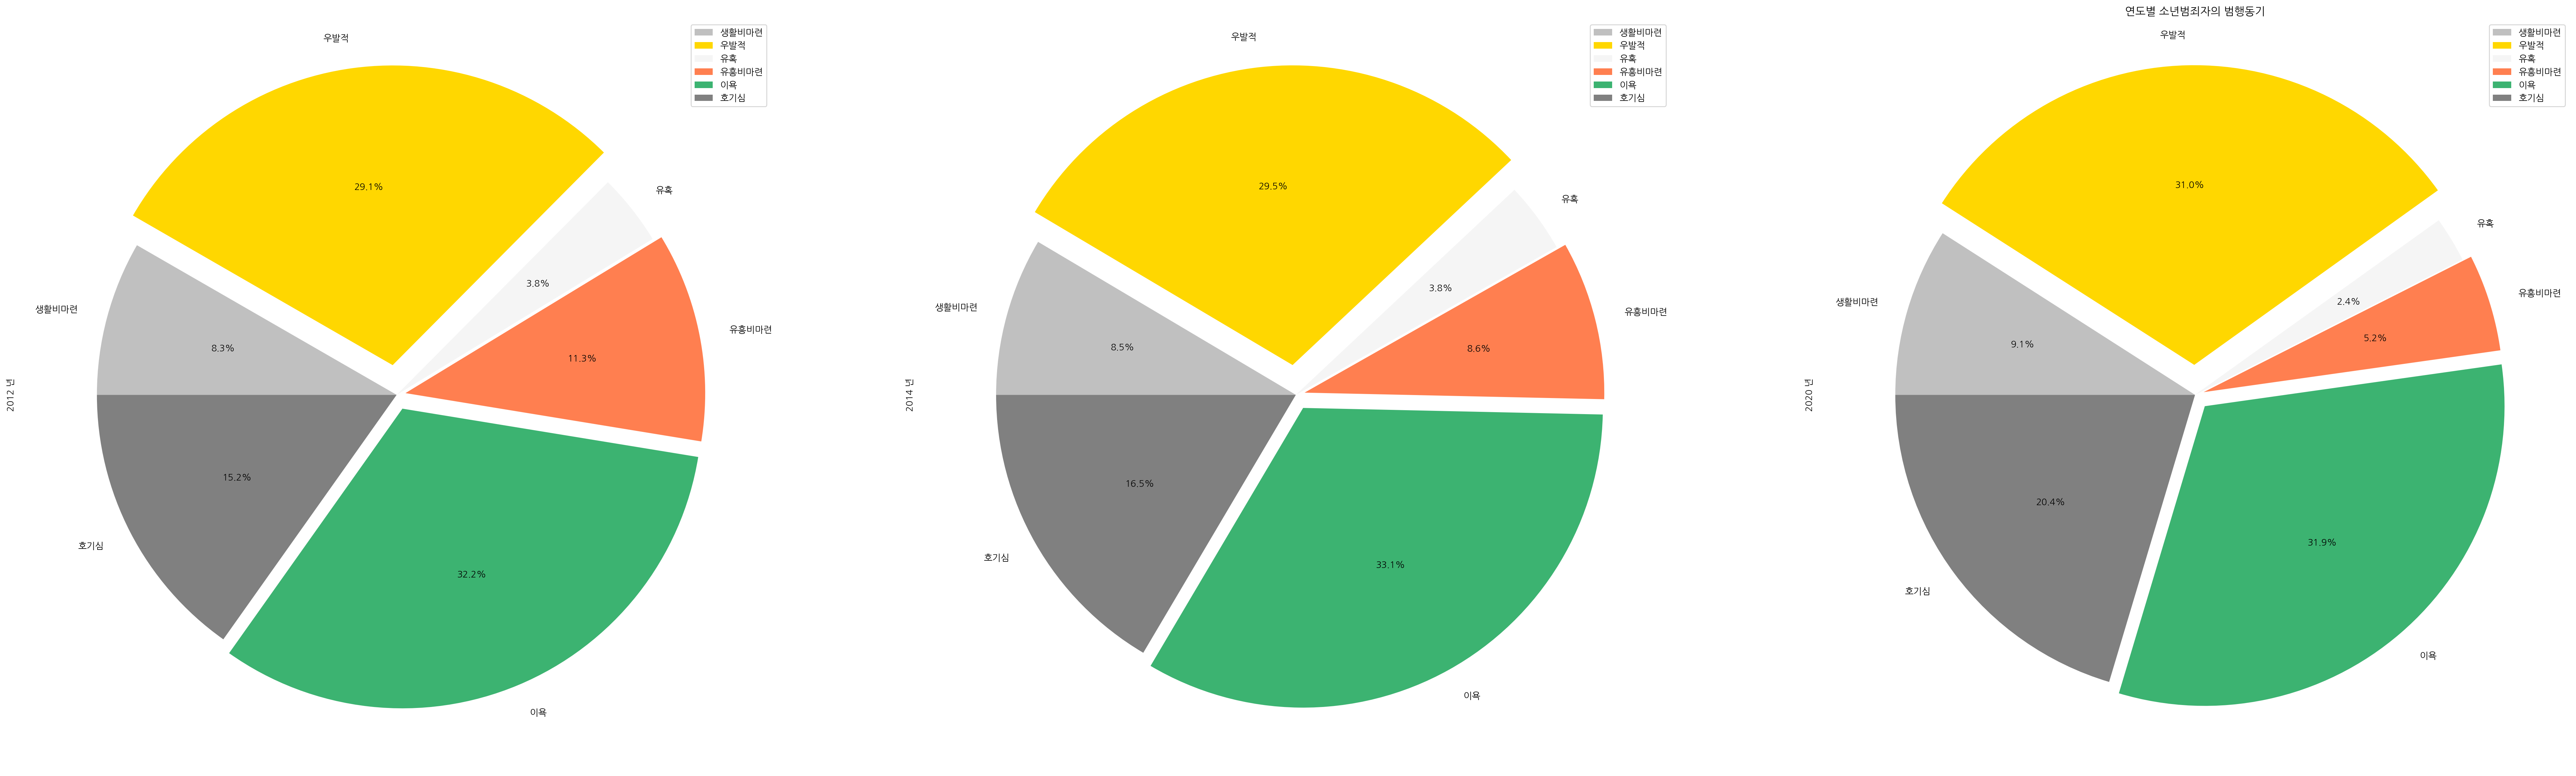

In [23]:
explode = [0, 0.1, 0, 0.03, 0.05, 0]
colors = ['silver','gold','whitesmoke', 'coral','mediumseagreen','grey']
re2_5_2012_2014_2020.plot(kind='pie', figsize=(50,100), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False, explode=explode, colors=colors)

plt.title("연도별 소년범죄자의 범행동기")

In [24]:
df_reer = re2_5.transpose()
df_reer['평균'] = (df_reer['2011 년'] + df_reer['2012 년'] + df_reer['2013 년'] + df_reer['2014 년'] + df_reer['2015 년'] + df_reer['2016 년'] + df_reer['2017 년'] + df_reer['2018 년'] + df_reer['2019 년'] + df_reer['2020 년'] + df_reer['2021 년'] / 11).round(2)
df_reer = df_reer.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년','2021 년'], axis=1)
df_reer

,평균
범행동기별,
생활비마련,18059.27
우발적,62111.09
유혹,7496.09
유흥비마련,18215.73
이욕,68432.55
호기심,35211.91


<AxesSubplot:xlabel='범행동기별'>

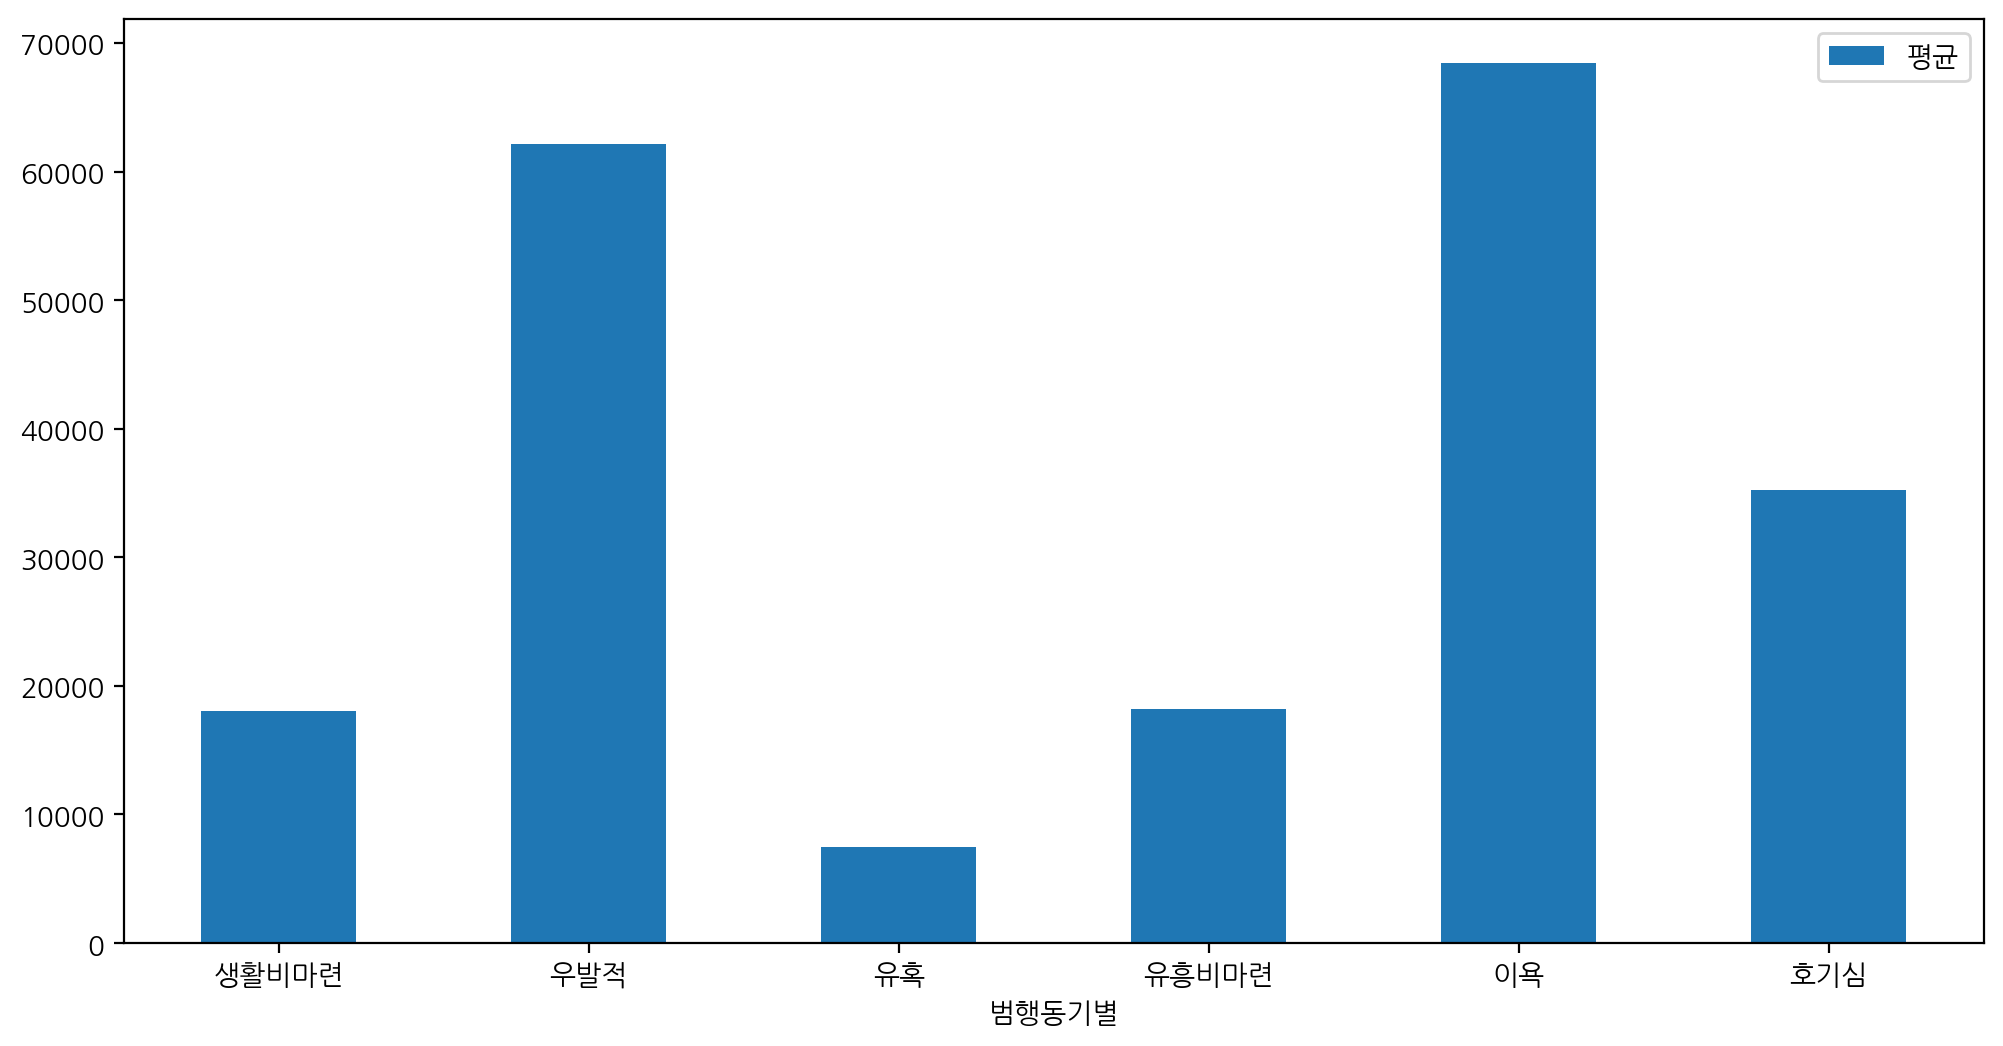

In [25]:
df_reer.plot.bar(figsize=(12,6), rot=0 )

Text(0.5, 1.0, '소년범의 평균 범행동기')

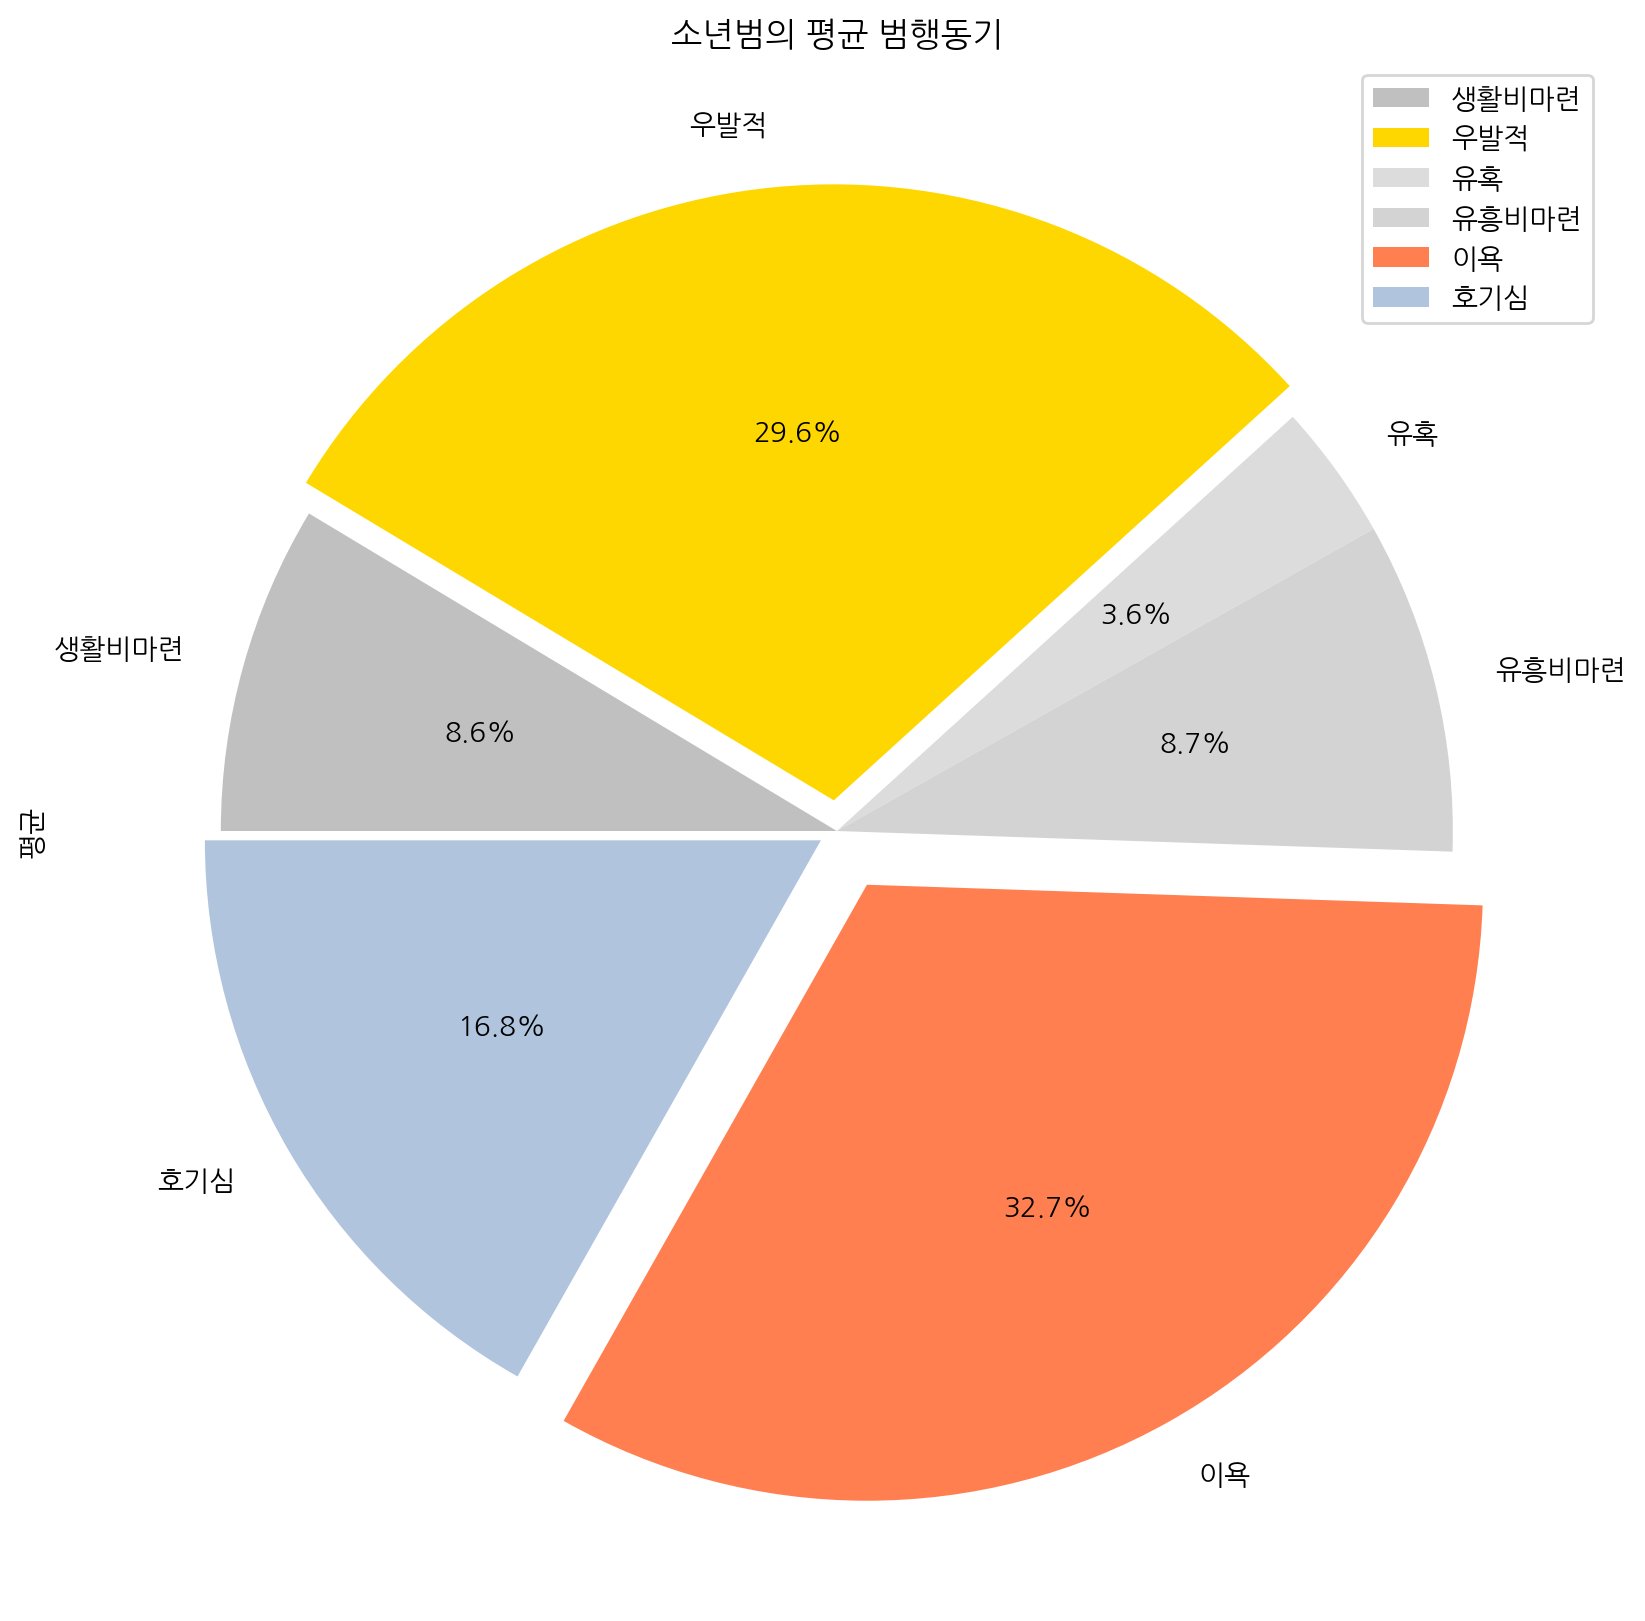

In [38]:
explode = [0, 0.05, 0, 0, 0.1, 0.03]
colors = ['silver','gold','gainsboro', 'lightgray','coral','lightsteelblue']
df_reer.plot(kind='pie', figsize=(12,10), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False, explode=explode, colors=colors)

plt.title("소년범의 평균 범행동기")

In [275]:
df_re2_2021 = re2_5.transpose()
df_re2_2021 = df_re2_2021.drop(['2011 년','2012 년','2013 년','2014 년','2015 년','2016 년','2017 년','2018 년','2019 년','2020 년'], axis=1)
df_re2_2021

,2021 년
범행동기별,
생활비마련,1048
우발적,3576
유혹,419
유흥비마련,569
이욕,3515
호기심,2375


Text(0.5, 1.0, '2021년 소년범의 평균 범행동기')

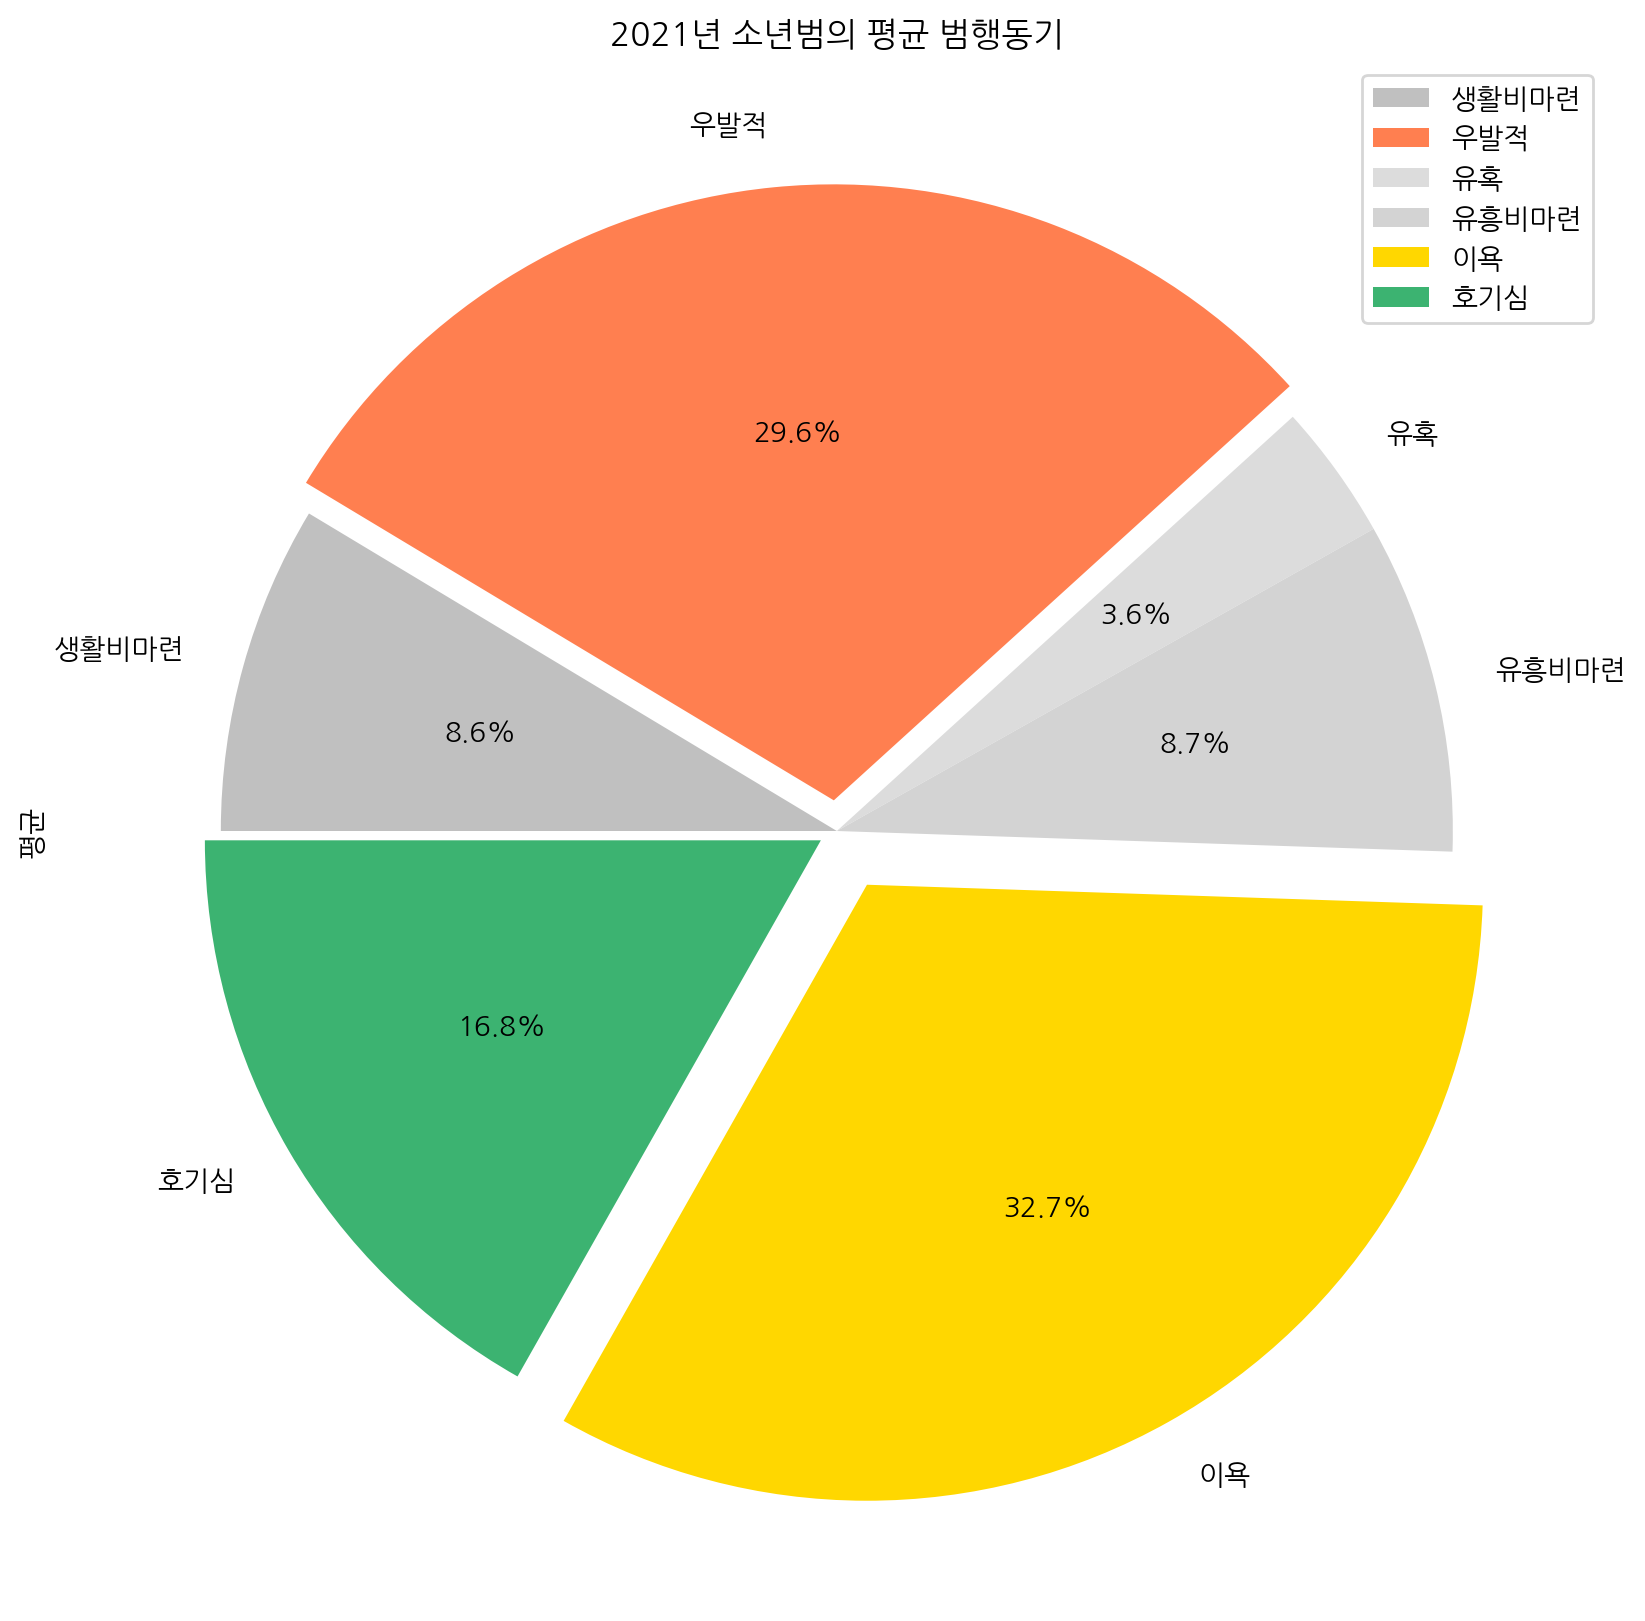

In [276]:
explode = [0, 0.05, 0, 0, 0.1, 0.03]
colors = ['silver','coral','gainsboro', 'lightgray','gold','mediumseagreen']
df_reer.plot(kind='pie', figsize=(12,10), subplots=True, autopct='%1.1f%%', startangle=180,counterclock=False, explode=explode, colors=colors)

plt.title("2021년 소년범의 평균 범행동기")

Text(0.5, 1.0, '2021년 가장높은 범행동기 비교')

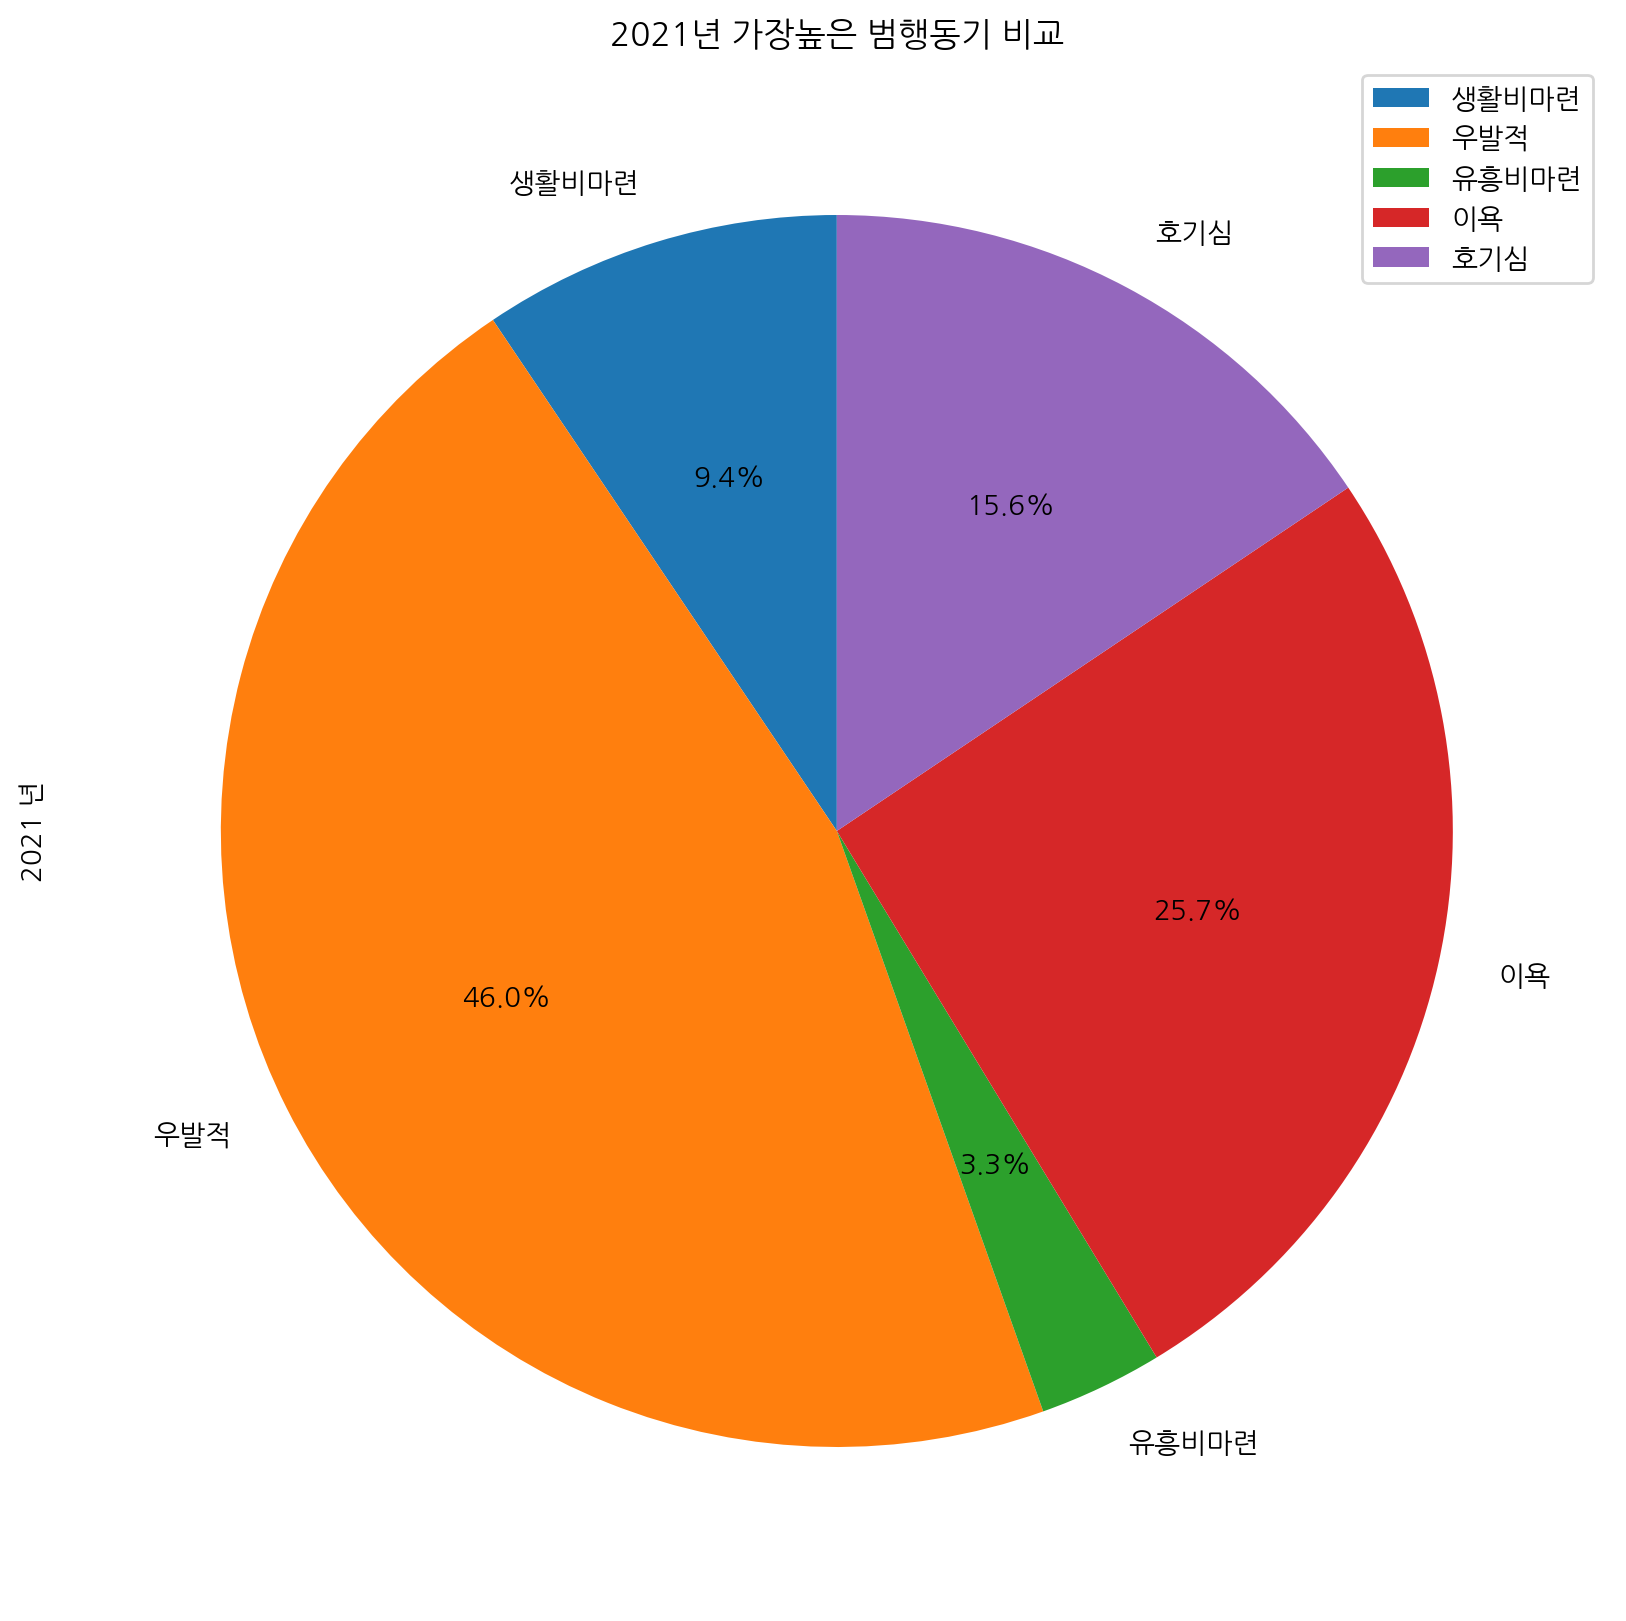

In [141]:

df_re2_2021.plot(kind='pie', figsize=(13,10), subplots=True, autopct='%1.1f%%', startangle=90)

plt.title("2021년 가장높은 범행동기 비교")